# Linebackers EDA & Hypothesis Testing

What makes a prospect a pick? I've collected all this data but what will really matter when predicting a round a prospect will be picked in. I know I want to model based for each of the following position groups:

        * Quarterbacks (QBs)
        * Receivers & Running Backs (Receivers)
        * Offensive Line (OffensiveLine)
        * Linebackers (LBs)
        * Defensive Backs (DefensiveBacks)
        * Special Teams (SpecialTeams)
        
Before I start modeling, I want to check out my data and get to know what will matter when trying to nail down just which round a prospect will be selected in. I start by visualizing the distribution of my outcome in a given position group. From there I pass each variable I think I may want in my model.

In this notebook, I look into my Linebackers data.

First things first, I need to load in my models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import scipy

import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_pickle('../../mod5project/pickle_files/cleaned_df')

In [5]:
df.head()

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

## Functions

This is a lot of repetition so I build function to streamline the process over the 6 groups I need to investigate.

In [5]:
def position_family_df(position_family, df):
    """
    This funciton will filter for the specific position group - or family - I'm interested in for a 
    particular notebook. 
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
        
    Returns:
        dataframe: filtered dataframe
        
    """
    dataframe = df[df['Pos'] == position_family]
    return dataframe

In [6]:
def plot_outcomes(position_family, df):
    """
    This function returns the count for each round a given position group has and graphs it. Along with the count,
    it will also print the normalized count -- % to total -- as a point of comparison.
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
    
    Returns:
        Dataframe shape, value counts for each round and the countplot for the distribution
        
    """
    dataframe = df
    print(position_family + ' Count: ')
    print('-'*40)
    print(position_family + ' Shape: ', dataframe.shape)
    print(dataframe['Round'].value_counts())
    print(round(dataframe['Round'].value_counts(normalize=True), 2))
    order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Not Drafted']
    plt.figure(figsize=(10, 6))
    sns.countplot(dataframe['Round'],order=order, palette='bright');
    plt.title(position_family + ' Round Distribution')
    plt.savefig(position_family + '_round_distro')
    plt.show()

In [7]:
def plot_stats(position_family, df, lst):
    """
    The function returns the descriptive statistics for each item in a list. The list in question is a set of 
    feature I'm parsing through to determine if they're statistically significant. I want to first check their 
    distribution by plotting each feature's boxplot.
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
        lst: feature list
        
    Returns:
        Prints descriptive statistics, mean by Round for the feature and plots the distribution boxplot.
    
    """
    for i in lst:
        dataframe = df
        order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Not Drafted']
        print(position_family + ' ' + i + ' Summary:')
        print(dataframe[i].describe())
        print('-' * 40)
        print(position_family + ' ' + i + ' by Round')
        print(dataframe[['Round', i]].groupby(['Round']).mean())
        plt.figure(figsize = (10,6))
        plt.title(position_family + ' ' + i + ' Distribution')
        sns.boxplot(y=dataframe[i], x=dataframe['Round'], order=order)
        plt.savefig(position_family + '_' + i + '_Distro')
        plt.show()

In [8]:
def anova_tukey(position_family, df, feature):
    """
    This function runs the ANOVA test checking for significance between a given feature and the output variable along
    with the 
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
        feature: feature being tested  
        
    Returns:
        Prints ANOVA test summary and Tukey-MC analysis
    
    """
    dataframe = df
    anova_rounds = ols(feature + '~Round', data=dataframe).fit()
    anova_rounds
    anova_table = sm.stats.anova_lm(anova_rounds, type=2)
    print(anova_table)
    print('')
    mc = MultiComparison(dataframe[feature], dataframe['Round'])
    mc_results = mc.tukeyhsd()
    print(mc_results.summary())

## EDA & Hypothesis Testing

In [9]:
df = position_family_df('LBs', df)
df.head()

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
32,Ian Gold,OLB,Michigan,2000,73,221,4.56,33.00,21.00,115.00,6.97,4.19,Denver Broncos,2nd,40th pick,2000,11.00,0.00,0.00,0.00,0.00,0.00,1.00,17.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,1.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,1,LBs
35,Barrett Green,OLB,West Virginia,2000,72,233,4.56,36.00,22.00,120.00,0.00,0.00,Detroit Lions,2nd,50th pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,11.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,0,LBs
63,Corey Moore,OLB,Virginia Tech,2000,71,223,4.60,0.00,21.00,0.00,0.00,0.00,Buffalo Bills,3rd,89th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

LBs Count: 
----------------------------------------
LBs Shape:  (681, 121)
Not Drafted    189
3rd             89
4th             81
5th             80
2nd             77
1st             65
7th             50
6th             50
Name: Round, dtype: int64
Not Drafted   0.28
3rd           0.13
4th           0.12
5th           0.12
2nd           0.11
1st           0.10
7th           0.07
6th           0.07
Name: Round, dtype: float64


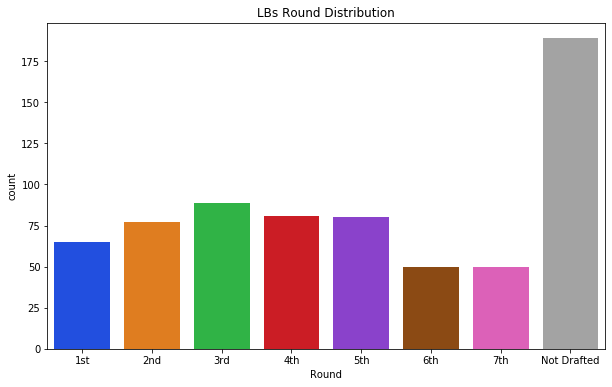

In [10]:
plot_outcomes('LBs', df)

### Height & Weight

In [11]:
height_weight = ['Height', 'Weight']

LBs Height Summary:
count   681.00
mean     73.54
std       1.43
min      69.00
25%      73.00
50%      73.00
75%      74.00
max      78.00
Name: Height, dtype: float64
----------------------------------------
LBs Height by Round
             Height
Round              
1st           74.15
2nd           73.62
3rd           73.62
4th           73.51
5th           73.39
6th           73.50
7th           73.38
Not Drafted   73.39


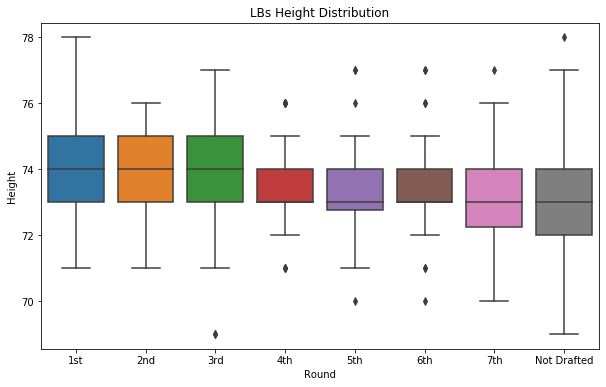

LBs Weight Summary:
count   681.00
mean    240.24
std       9.17
min     218.00
25%     234.00
50%     240.00
75%     246.00
max     280.00
Name: Weight, dtype: float64
----------------------------------------
LBs Weight by Round
             Weight
Round              
1st          244.31
2nd          241.81
3rd          240.18
4th          240.05
5th          239.86
6th          238.08
7th          241.06
Not Drafted  238.82


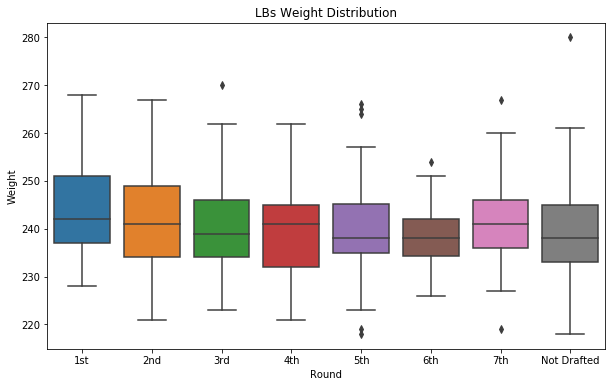

In [12]:
plot_stats('LBs', df, height_weight)

In [13]:
anova_tukey('LBs', df, 'Height')

             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00   33.35     4.76 2.36    0.02
Residual 673.00 1357.87     2.02  nan     nan

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd  -0.5305  0.343 -1.2579   0.197  False
   1st         3rd  -0.5359 0.2885 -1.2405  0.1688  False
   1st         4th  -0.6477 0.1133 -1.3669  0.0715  False
   1st         5th  -0.7663 0.0282 -1.4875 -0.0452   True
   1st         6th  -0.6538 0.2206 -1.4662  0.1585  False
   1st         7th  -0.7738 0.0752 -1.5862  0.0385  False
   1st Not Drafted  -0.7676 0.0046 -1.3886 -0.1466   True
   2nd         3rd  -0.0054    0.9 -0.6776  0.6668  False
   2nd         4th  -0.1172    0.9 -0.8046  0.5702  False
   2nd         5th  -0.2359    0.9 -0.9254  0.4536  False
   2nd         6th  -0.1234    0.9 -0.9078   0.661  False
   2nd         7th  -0.2434    0.9 -1.0278   0.54

In [14]:
anova_tukey('LBs', df, 'Weight')

             df   sum_sq  mean_sq    F  PR(>F)
Round      7.00  1926.74   275.25 3.36    0.00
Residual 673.00 55192.72    82.01  nan     nan

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
   1st         2nd  -2.5025 0.6985  -7.1403  2.1353  False
   1st         3rd  -4.1279 0.0981  -8.6203  0.3645  False
   1st         4th  -4.2583 0.0906  -8.8434  0.3268  False
   1st         5th  -4.4452 0.0668   -9.043  0.1526  False
   1st         6th  -6.2277 0.0067 -11.4071 -1.0483   True
   1st         7th  -3.2477 0.5401  -8.4271  1.9317  False
   1st Not Drafted  -5.4876  0.001  -9.4467 -1.5284   True
   2nd         3rd  -1.6254    0.9  -5.9108  2.6599  False
   2nd         4th  -1.7558    0.9  -6.1382  2.6266  False
   2nd         5th  -1.9427 0.8754  -6.3384   2.453  False
   2nd         6th  -3.7252 0.3147   -8.726  1.2756  False
   2nd         7th  -0.7452    0

### Combine Stats

In [15]:
combine_columns = df[['_40yd', 'Vertical', 'Bench', 'BroadJump', '_3Cone', 'Shuttle']]
combine_columns.describe()

,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle
count,681.00,681.00,681.00,681.00,681.00,681.00
mean,4.41,26.37,17.23,92.98,4.39,2.73
std,1.14,14.50,10.17,47.65,3.48,2.07
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.59,28.50,15.00,108.00,0.00,0.00
50%,4.68,32.50,20.00,115.00,6.93,4.17
75%,4.77,35.50,24.00,120.00,7.18,4.34
max,5.09,45.50,41.00,139.00,7.97,4.75


In [16]:
combine_stats = ['_40yd', 'Vertical', 'Bench', 'BroadJump', '_3Cone', 'Shuttle']

LBs _40yd Summary:
count   681.00
mean      4.41
std       1.14
min       0.00
25%       4.59
50%       4.68
75%       4.77
max       5.09
Name: _40yd, dtype: float64
----------------------------------------
LBs _40yd by Round
             _40yd
Round             
1st           4.30
2nd           4.42
3rd           4.50
4th           4.51
5th           4.27
6th           4.45
7th           4.45
Not Drafted   4.39


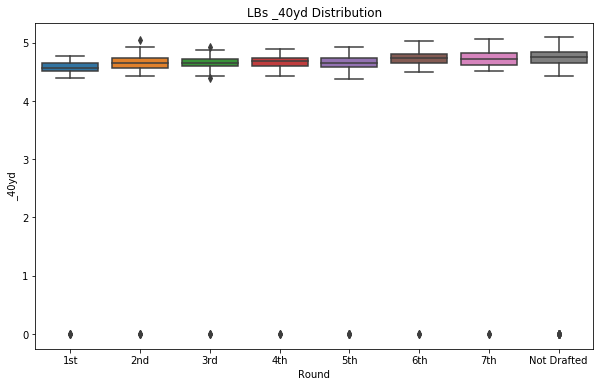

LBs Vertical Summary:
count   681.00
mean     26.37
std      14.50
min       0.00
25%      28.50
50%      32.50
75%      35.50
max      45.50
Name: Vertical, dtype: float64
----------------------------------------
LBs Vertical by Round
             Vertical
Round                
1st             27.33
2nd             26.26
3rd             28.06
4th             25.86
5th             28.53
6th             26.38
7th             28.06
Not Drafted     24.16


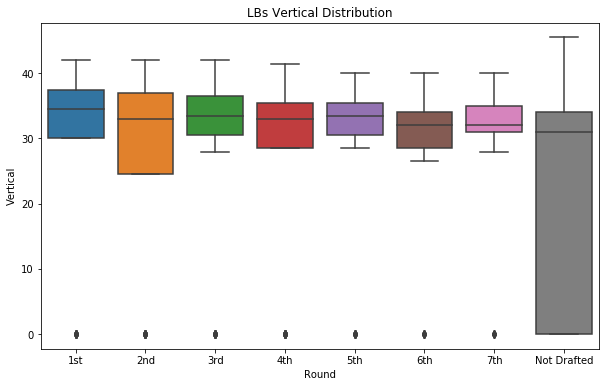

LBs Bench Summary:
count   681.00
mean     17.23
std      10.17
min       0.00
25%      15.00
50%      20.00
75%      24.00
max      41.00
Name: Bench, dtype: float64
----------------------------------------
LBs Bench by Round
             Bench
Round             
1st          15.58
2nd          15.49
3rd          18.60
4th          18.74
5th          18.70
6th          18.62
7th          20.12
Not Drafted  15.48


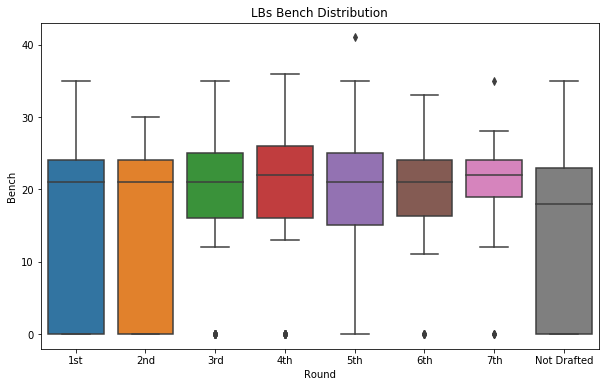

LBs BroadJump Summary:
count   681.00
mean     92.98
std      47.65
min       0.00
25%     108.00
50%     115.00
75%     120.00
max     139.00
Name: BroadJump, dtype: float64
----------------------------------------
LBs BroadJump by Round
             BroadJump
Round                 
1st              93.46
2nd              90.53
3rd              94.71
4th              90.14
5th             101.05
6th              94.82
7th             100.46
Not Drafted      88.32


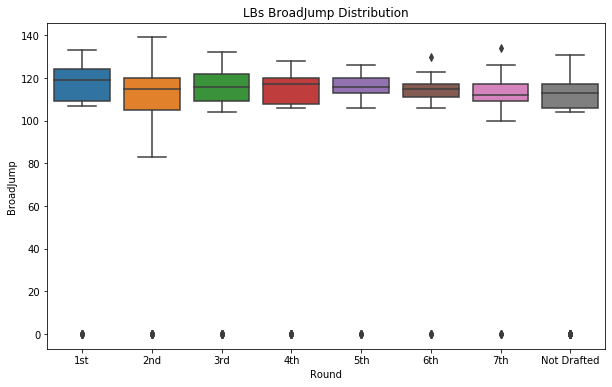

LBs _3Cone Summary:
count   681.00
mean      4.39
std       3.48
min       0.00
25%       0.00
50%       6.93
75%       7.18
max       7.97
Name: _3Cone, dtype: float64
----------------------------------------
LBs _3Cone by Round
             _3Cone
Round              
1st            4.75
2nd            4.09
3rd            4.70
4th            4.38
5th            4.72
6th            4.58
7th            4.30
Not Drafted    4.07


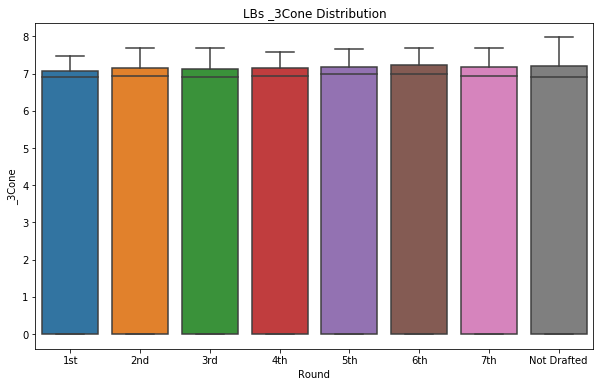

LBs Shuttle Summary:
count   681.00
mean      2.73
std       2.07
min       0.00
25%       0.00
50%       4.17
75%       4.34
max       4.75
Name: Shuttle, dtype: float64
----------------------------------------
LBs Shuttle by Round
             Shuttle
Round               
1st             2.85
2nd             2.38
3rd             2.98
4th             2.85
5th             2.94
6th             2.85
7th             2.68
Not Drafted     2.57


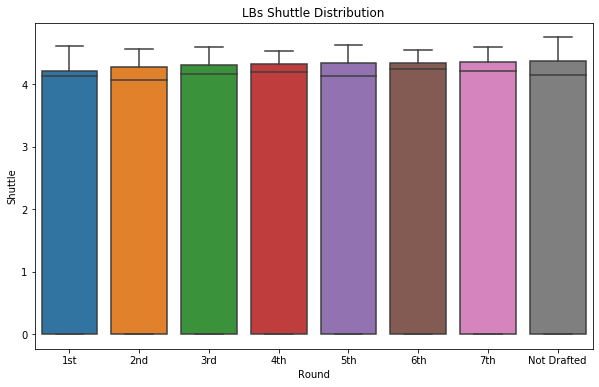

In [17]:
plot_stats('LBs', df, combine_stats)

In [18]:
for i in combine_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df, i)
    print('')
    print('*' * 60)

_40yd ANOVA Test:
----------------------------------------
             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00    4.27     0.61 0.47    0.86
Residual 673.00  876.47     1.30  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.1248    0.9 -0.4596 0.7092  False
   1st         3rd   0.2024    0.9 -0.3638 0.7685  False
   1st         4th   0.2105    0.9 -0.3673 0.7883  False
   1st         5th  -0.0338    0.9 -0.6132 0.5457  False
   1st         6th   0.1542    0.9 -0.4985 0.8069  False
   1st         7th   0.1492    0.9 -0.5035 0.8019  False
   1st Not Drafted   0.0914    0.9 -0.4075 0.5903  False
   2nd         3rd   0.0776    0.9 -0.4625 0.6176  False
   2nd         4th   0.0857    0.9 -0.4666 0.6379  False
   2nd         5th  -0.1586    0.9 -0.7125 0.3954  False
   2nd         6th   0.0294    0.9 -0.6008 0.6596  False
   2

             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00   26.20     3.74 0.87    0.53
Residual 673.00 2880.29     4.28  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.4754 0.8631 -1.5349  0.584  False
   1st         3rd   0.1225    0.9 -0.9038 1.1488  False
   1st         4th  -0.0062    0.9 -1.0536 1.0413  False
   1st         5th   0.0818    0.9 -0.9685 1.1322  False
   1st         6th  -0.0033    0.9 -1.1865 1.1799  False
   1st         7th  -0.1773    0.9 -1.3605 1.0059  False
   1st Not Drafted  -0.2851    0.9 -1.1895 0.6194  False
   2nd         3rd   0.5979 0.5696  -0.381 1.5769  False
   2nd         4th   0.4693 0.8268 -0.5318 1.4704  False
   2nd         5th   0.5573 0.6707 -0.4469 1.5614  False
   2nd         6th   0.4721    0.9 -0.6703 1.6145  False
   2nd         7th   0.2981    0.9 -0.8443 1.4405  False
   2nd

### College Stats - Passing

In [19]:
passing_stats = ['Passing_Games', 'Completions', 'Pass_Attempts', 'Completion_Percent', 'Pass_Yards', 
                 'Pass_Yds_per_Attempt', 'Adj_Pass_Yds_per_Attempt', 'Pass_TDs', 'Pass_Interceptions', 'Passer_Rating', 
                 'CompletionsperGame', 'Pass_AttemptsperGame', 'Pass_YardsperGame', 'Pass_TDsperGame', 
                 'Pass_InterceptionsperGame']

In [20]:
df[passing_stats].describe()

,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,0.07,0.00,0.00,0.15,0.03,0.03,0.03,0.00,0.00,0.43,0.00,0.00,0.00,0.00,0.00
std,0.94,0.04,0.04,3.83,0.88,0.88,0.88,0.00,0.00,11.24,0.00,0.00,0.07,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,13.00,1.00,1.00,100.00,23.00,23.00,23.00,0.00,0.00,293.20,0.08,0.08,1.92,0.00,0.00


LBs Passing_Games Summary:
count   681.00
mean      0.07
std       0.94
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      13.00
Name: Passing_Games, dtype: float64
----------------------------------------
LBs Passing_Games by Round
             Passing_Games
Round                     
1st                   0.00
2nd                   0.00
3rd                   0.28
4th                   0.00
5th                   0.00
6th                   0.24
7th                   0.00
Not Drafted           0.06


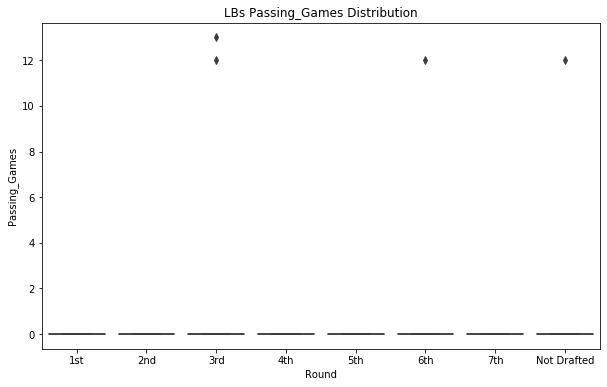

LBs Completions Summary:
count   681.00
mean      0.00
std       0.04
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: Completions, dtype: float64
----------------------------------------
LBs Completions by Round
             Completions
Round                   
1st                 0.00
2nd                 0.00
3rd                 0.01
4th                 0.00
5th                 0.00
6th                 0.00
7th                 0.00
Not Drafted         0.00


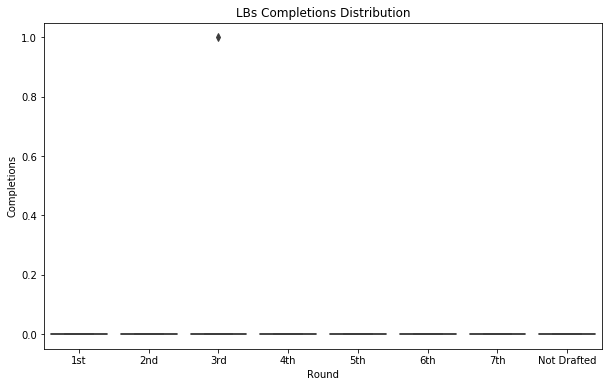

LBs Pass_Attempts Summary:
count   681.00
mean      0.00
std       0.04
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: Pass_Attempts, dtype: float64
----------------------------------------
LBs Pass_Attempts by Round
             Pass_Attempts
Round                     
1st                   0.00
2nd                   0.00
3rd                   0.01
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


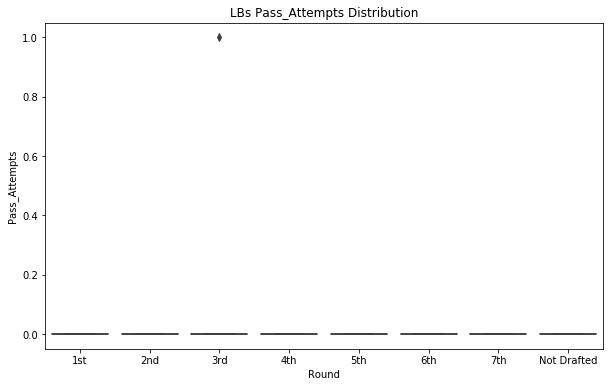

LBs Completion_Percent Summary:
count   681.00
mean      0.15
std       3.83
min       0.00
25%       0.00
50%       0.00
75%       0.00
max     100.00
Name: Completion_Percent, dtype: float64
----------------------------------------
LBs Completion_Percent by Round
             Completion_Percent
Round                          
1st                        0.00
2nd                        0.00
3rd                        1.12
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


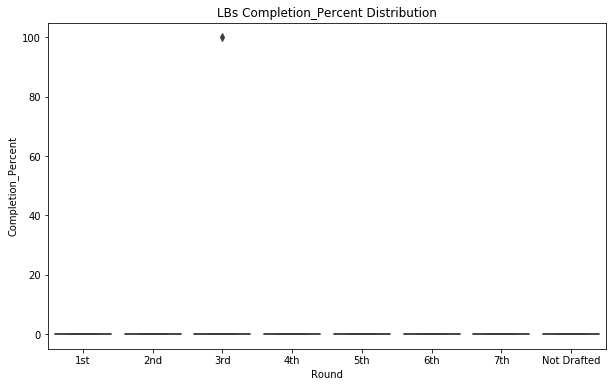

LBs Pass_Yards Summary:
count   681.00
mean      0.03
std       0.88
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      23.00
Name: Pass_Yards, dtype: float64
----------------------------------------
LBs Pass_Yards by Round
             Pass_Yards
Round                  
1st                0.00
2nd                0.00
3rd                0.26
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        0.00


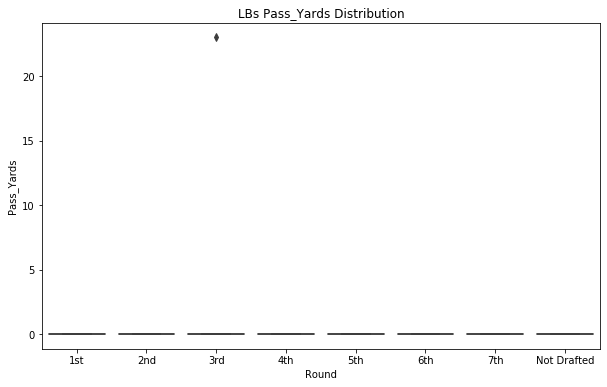

LBs Pass_Yds_per_Attempt Summary:
count   681.00
mean      0.03
std       0.88
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      23.00
Name: Pass_Yds_per_Attempt, dtype: float64
----------------------------------------
LBs Pass_Yds_per_Attempt by Round
             Pass_Yds_per_Attempt
Round                            
1st                          0.00
2nd                          0.00
3rd                          0.26
4th                          0.00
5th                          0.00
6th                          0.00
7th                          0.00
Not Drafted                  0.00


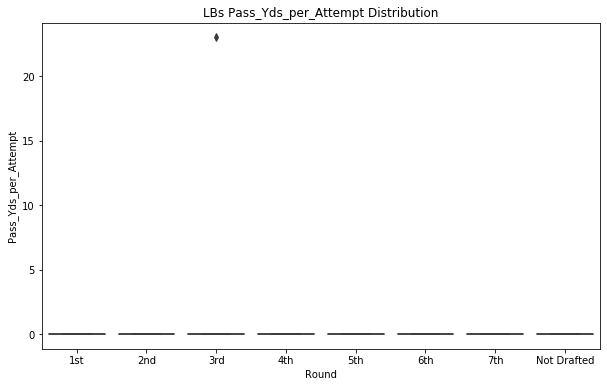

LBs Adj_Pass_Yds_per_Attempt Summary:
count   681.00
mean      0.03
std       0.88
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      23.00
Name: Adj_Pass_Yds_per_Attempt, dtype: float64
----------------------------------------
LBs Adj_Pass_Yds_per_Attempt by Round
             Adj_Pass_Yds_per_Attempt
Round                                
1st                              0.00
2nd                              0.00
3rd                              0.26
4th                              0.00
5th                              0.00
6th                              0.00
7th                              0.00
Not Drafted                      0.00


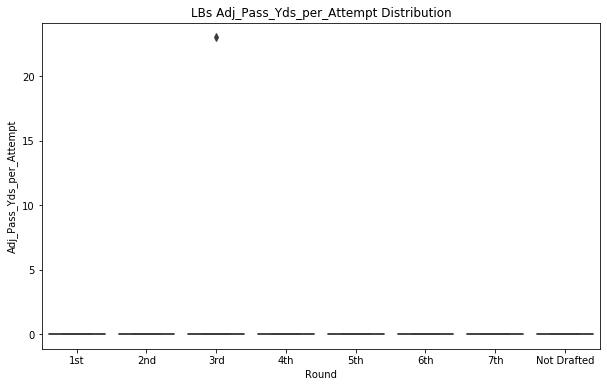

LBs Pass_TDs Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Pass_TDs, dtype: float64
----------------------------------------
LBs Pass_TDs by Round
             Pass_TDs
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


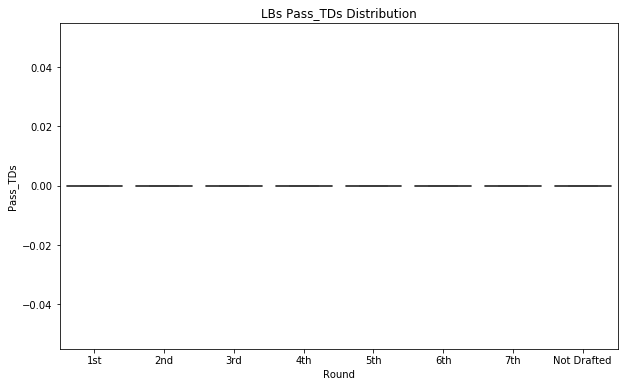

LBs Pass_Interceptions Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Pass_Interceptions, dtype: float64
----------------------------------------
LBs Pass_Interceptions by Round
             Pass_Interceptions
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


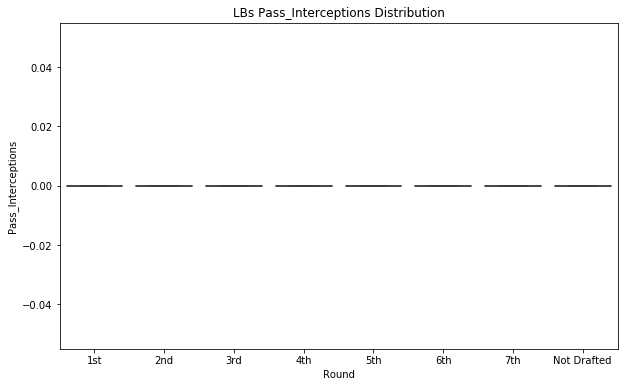

LBs Passer_Rating Summary:
count   681.00
mean      0.43
std      11.24
min       0.00
25%       0.00
50%       0.00
75%       0.00
max     293.20
Name: Passer_Rating, dtype: float64
----------------------------------------
LBs Passer_Rating by Round
             Passer_Rating
Round                     
1st                   0.00
2nd                   0.00
3rd                   3.29
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


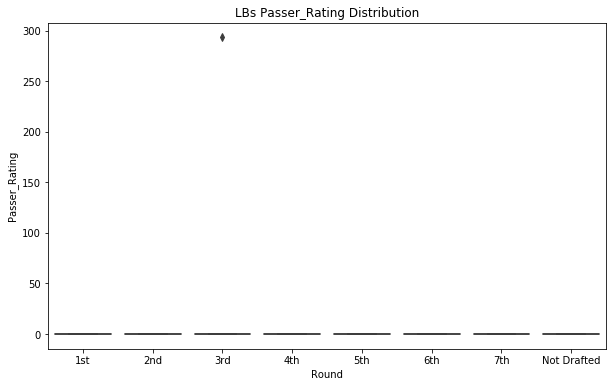

LBs CompletionsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.08
Name: CompletionsperGame, dtype: float64
----------------------------------------
LBs CompletionsperGame by Round
             CompletionsperGame
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


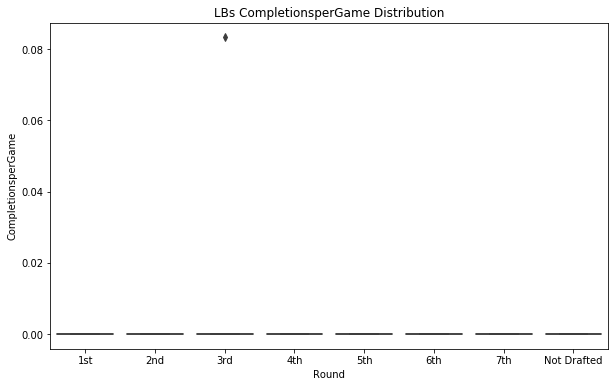

LBs Pass_AttemptsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.08
Name: Pass_AttemptsperGame, dtype: float64
----------------------------------------
LBs Pass_AttemptsperGame by Round
             Pass_AttemptsperGame
Round                            
1st                          0.00
2nd                          0.00
3rd                          0.00
4th                          0.00
5th                          0.00
6th                          0.00
7th                          0.00
Not Drafted                  0.00


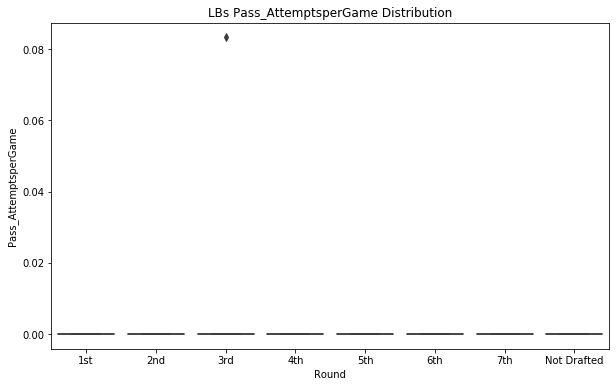

LBs Pass_YardsperGame Summary:
count   681.00
mean      0.00
std       0.07
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.92
Name: Pass_YardsperGame, dtype: float64
----------------------------------------
LBs Pass_YardsperGame by Round
             Pass_YardsperGame
Round                         
1st                       0.00
2nd                       0.00
3rd                       0.02
4th                       0.00
5th                       0.00
6th                       0.00
7th                       0.00
Not Drafted               0.00


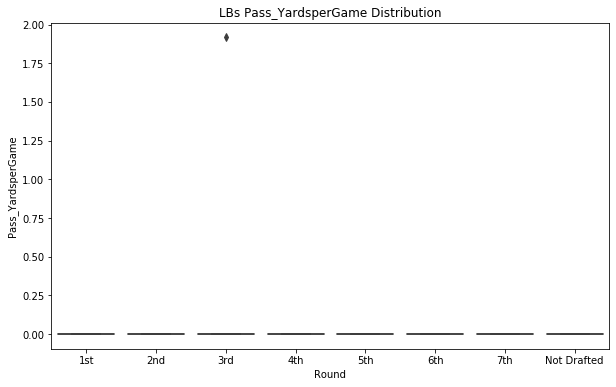

LBs Pass_TDsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Pass_TDsperGame, dtype: float64
----------------------------------------
LBs Pass_TDsperGame by Round
             Pass_TDsperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


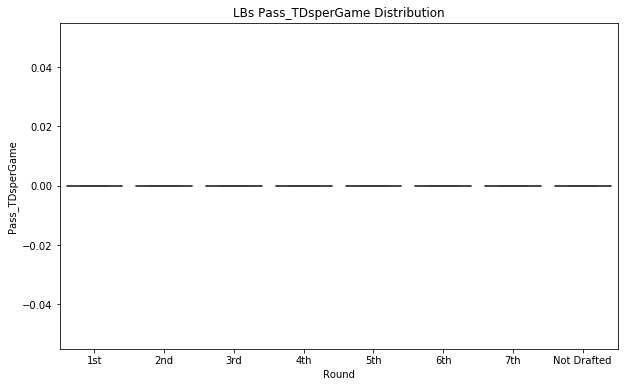

LBs Pass_InterceptionsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Pass_InterceptionsperGame, dtype: float64
----------------------------------------
LBs Pass_InterceptionsperGame by Round
             Pass_InterceptionsperGame
Round                                 
1st                               0.00
2nd                               0.00
3rd                               0.00
4th                               0.00
5th                               0.00
6th                               0.00
7th                               0.00
Not Drafted                       0.00


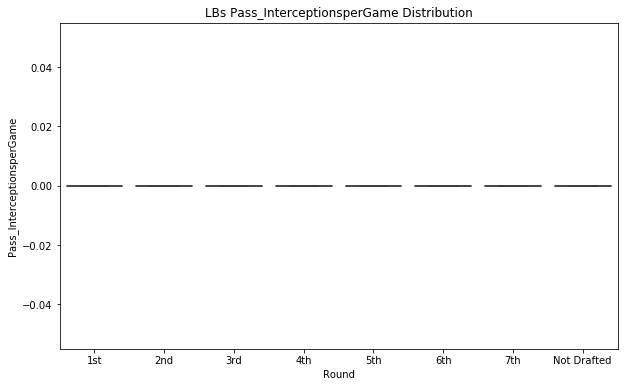

In [21]:
plot_stats('LBs', df, passing_stats)

In [22]:
for i in passing_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df, i)
    print('')
    print('*' * 40)

Passing_Games ANOVA Test:
----------------------------------------
             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00    7.14     1.02 1.16    0.32
Residual 673.00  590.34     0.88  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd      0.0    0.9 -0.4796 0.4796  False
   1st         3rd   0.2809 0.5808 -0.1837 0.7455  False
   1st         4th      0.0    0.9 -0.4742 0.4742  False
   1st         5th      0.0    0.9 -0.4755 0.4755  False
   1st         6th     0.24 0.8643 -0.2957 0.7757  False
   1st         7th      0.0    0.9 -0.5357 0.5357  False
   1st Not Drafted   0.0635    0.9  -0.346 0.4729  False
   2nd         3rd   0.2809 0.5279 -0.1623 0.7241  False
   2nd         4th      0.0    0.9 -0.4532 0.4532  False
   2nd         5th      0.0    0.9 -0.4546 0.4546  False
   2nd         6th     0.24 0.8354 -0.2772 0.7572  Fa

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd      0.0    0.9 -0.4515 0.4515  False
   1st         3rd   0.2584 0.6056 -0.1789 0.6958  False
   1st         4th      0.0    0.9 -0.4464 0.4464  False
   1st         5th      0.0    0.9 -0.4476 0.4476  False
   1st         6th      0.0    0.9 -0.5042 0.5042  False
   1st         7th      0.0    0.9 -0.5042 0.5042  False
   1st Not Drafted      0.0    0.9 -0.3854 0.3854  False
   2nd         3rd   0.2584 0.5538 -0.1587 0.6756  False
   2nd         4th      0.0    0.9 -0.4266 0.4266  False
   2nd         5th      0.0    0.9 -0.4279 0.4279  False
   2nd         6th      0.0    0.9 -0.4868 0.4868  False
   2nd         7th      0.0    0.9 -0.4868 0.4868  False
   2nd Not Drafted      0.0    0.9 -0.3624 0.3624  False
   3rd         4th  -0.2584 0.5387   -0.67 0.1532  False
   3rd         5th  -0.2584 0.5


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1s

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd      0.0    0.9 -0.0376 0.0376  False
   1st         3rd   0.0215 0.6056 -0.0149  0.058  False
   1st         4th      0.0    0.9 -0.0372 0.0372  False
   1st         5th      0.0    0.9 -0.0373 0.0373  False
   1st         6th      0.0    0.9  -0.042  0.042  False
   1st         7th      0.0    0.9  -0.042  0.042  False
   1st Not Drafted      0.0    0.9 -0.0321 0.0321  False
   2nd         3rd   0.0215 0.5538 -0.0132 0.0563  False
   2nd         4th      0.0    0.9 -0.0356 0.0356  False
   2nd         5th      0.0    0.9 -0.0357 0.0357  False
   2nd         6th      0.0    0.9 -0.0406 0.0406  False
   2nd         7th      0.0    0.9 -0.0406 0.0406  False
   2nd Not Drafted      0.0    0.9 -0.0302 0.0302  False
   3rd         4th  -0.0215 0.5387 -0.0558 0.0128  False
   3rd         5th  -0.0215 0.5

### College Stats - Rushing & Receiving

In [23]:
rushing_stats = ['Rush_Rec_Games', 'Rush_Attempts', 'Rush_Yds', 'Rush_Yds_per_Attempt', 'Rush_TDs', 
                 'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 'Rec_TDs', 'Plays_from_Scrimmage', 'Scrimmage_Yds',
                 'Scrimmage_Yds_per_Attempt', 'Scrimmage_TDs', 'Rush_AttemptsperGame', 'Rush_YdsperGame', 
                 'Rush_TDsperGame', 'ReceptionsperGame', 'Rec_YdsperGame', 'Rec_TDsperGame', 
                 'Plays_from_ScrimmageperGame', 'Scrimmage_YdsperGame', 'Scrimmage_TDsperGame']

In [24]:
df[rushing_stats].describe()

,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,0.89,0.17,1.53,0.48,0.01,0.01,0.08,0.02,0.00,0.17,1.61,0.48,0.01,0.01,0.12,0.00,0.00,0.01,0.00,0.01,0.12,0.00
std,3.21,2.48,18.91,4.32,0.14,0.15,2.15,0.54,0.00,2.63,20.90,4.32,0.14,0.18,1.37,0.02,0.01,0.15,0.00,0.19,1.52,0.02
min,0.00,0.00,-2.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.00,-2.00,0.00,0.00,-0.18,0.00,0.00,0.00,0.00,0.00,-0.18,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,14.00,61.00,456.00,57.00,2.00,4.00,56.00,14.00,0.00,65.00,512.00,57.00,2.00,4.36,32.57,0.33,0.29,4.00,0.00,4.64,36.57,0.33


LBs Rush_Rec_Games Summary:
count   681.00
mean      0.89
std       3.21
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      14.00
Name: Rush_Rec_Games, dtype: float64
----------------------------------------
LBs Rush_Rec_Games by Round
             Rush_Rec_Games
Round                      
1st                    1.60
2nd                    1.34
3rd                    0.65
4th                    0.93
5th                    0.60
6th                    0.98
7th                    0.00
Not Drafted            0.91


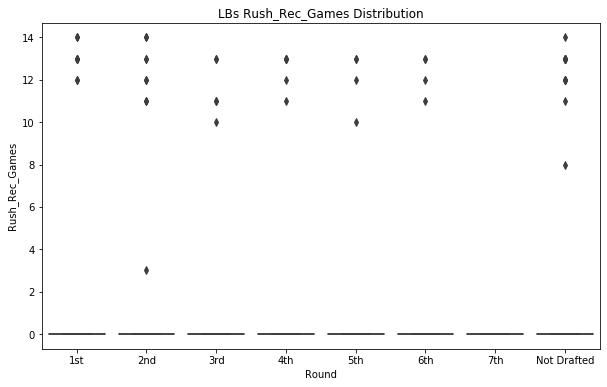

LBs Rush_Attempts Summary:
count   681.00
mean      0.17
std       2.48
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      61.00
Name: Rush_Attempts, dtype: float64
----------------------------------------
LBs Rush_Attempts by Round
             Rush_Attempts
Round                     
1st                   1.02
2nd                   0.05
3rd                   0.09
4th                   0.06
5th                   0.01
6th                   0.10
7th                   0.00
Not Drafted           0.14


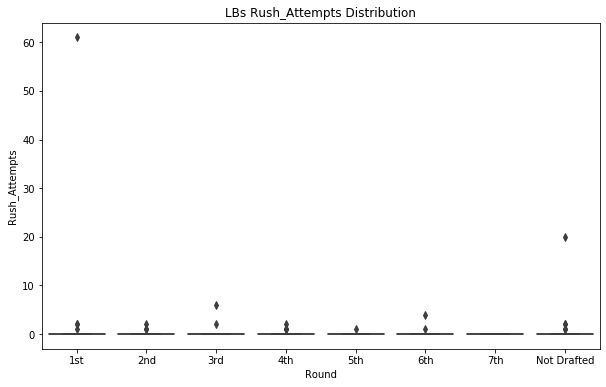

LBs Rush_Yds Summary:
count   681.00
mean      1.53
std      18.91
min      -2.00
25%       0.00
50%       0.00
75%       0.00
max     456.00
Name: Rush_Yds, dtype: float64
----------------------------------------
LBs Rush_Yds by Round
             Rush_Yds
Round                
1st              9.75
2nd              0.90
3rd              0.25
4th              1.31
5th              0.00
6th              0.20
7th              0.00
Not Drafted      1.05


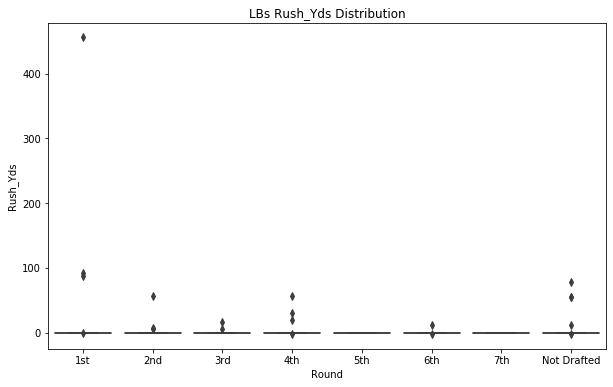

LBs Rush_Yds_per_Attempt Summary:
count   681.00
mean      0.48
std       4.32
min      -2.00
25%       0.00
50%       0.00
75%       0.00
max      57.00
Name: Rush_Yds_per_Attempt, dtype: float64
----------------------------------------
LBs Rush_Yds_per_Attempt by Round
             Rush_Yds_per_Attempt
Round                            
1st                          1.48
2nd                          0.85
3rd                          0.06
4th                          1.12
5th                          0.00
6th                          0.02
7th                          0.00
Not Drafted                  0.37


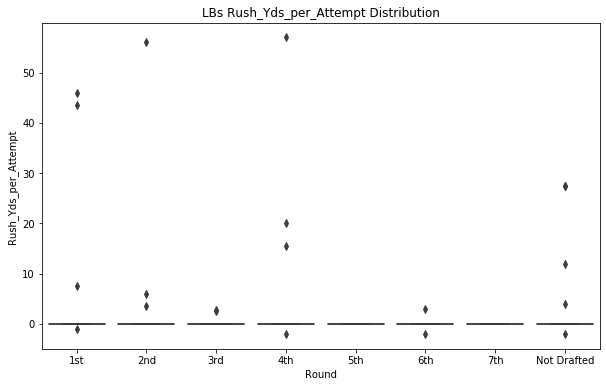

LBs Rush_TDs Summary:
count   681.00
mean      0.01
std       0.14
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       2.00
Name: Rush_TDs, dtype: float64
----------------------------------------
LBs Rush_TDs by Round
             Rush_TDs
Round                
1st              0.06
2nd              0.03
3rd              0.01
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.01


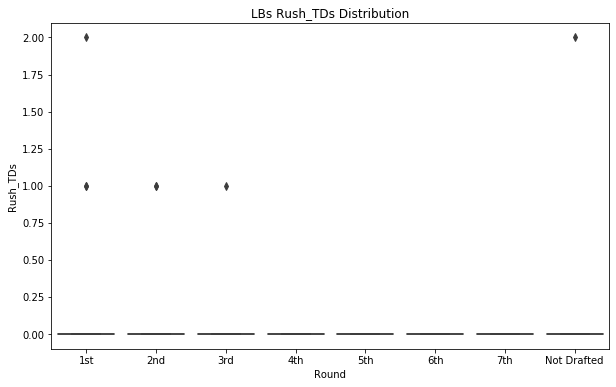

LBs Receptions Summary:
count   681.00
mean      0.01
std       0.15
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.00
Name: Receptions, dtype: float64
----------------------------------------
LBs Receptions by Round
             Receptions
Round                  
1st                0.06
2nd                0.00
3rd                0.00
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        0.00


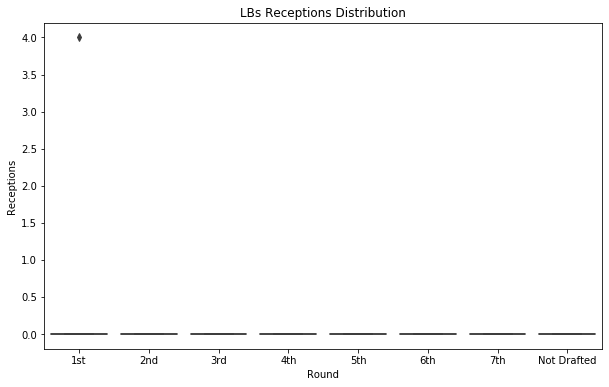

LBs Rec_Yds Summary:
count   681.00
mean      0.08
std       2.15
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      56.00
Name: Rec_Yds, dtype: float64
----------------------------------------
LBs Rec_Yds by Round
             Rec_Yds
Round               
1st             0.86
2nd             0.00
3rd             0.00
4th             0.00
5th             0.00
6th             0.00
7th             0.00
Not Drafted     0.00


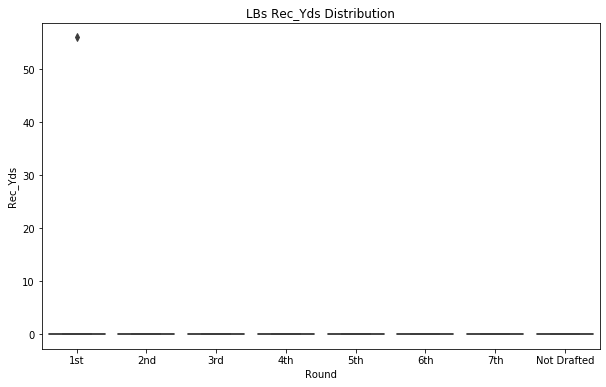

LBs Rec_Yds_per_Reception Summary:
count   681.00
mean      0.02
std       0.54
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      14.00
Name: Rec_Yds_per_Reception, dtype: float64
----------------------------------------
LBs Rec_Yds_per_Reception by Round
             Rec_Yds_per_Reception
Round                             
1st                           0.22
2nd                           0.00
3rd                           0.00
4th                           0.00
5th                           0.00
6th                           0.00
7th                           0.00
Not Drafted                   0.00


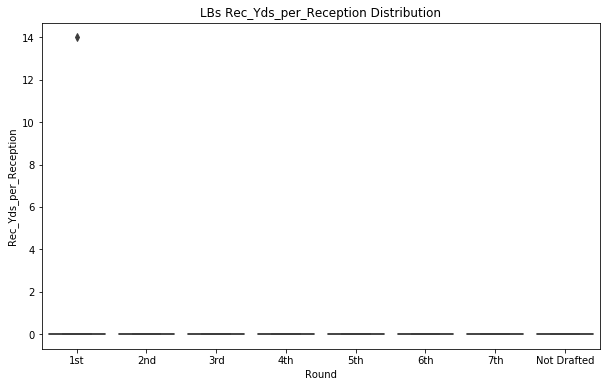

LBs Rec_TDs Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Rec_TDs, dtype: float64
----------------------------------------
LBs Rec_TDs by Round
             Rec_TDs
Round               
1st             0.00
2nd             0.00
3rd             0.00
4th             0.00
5th             0.00
6th             0.00
7th             0.00
Not Drafted     0.00


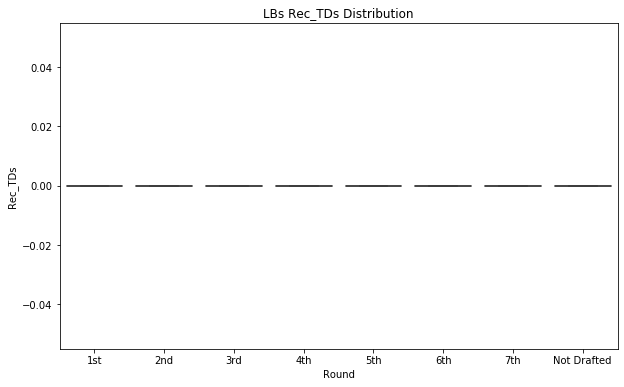

LBs Plays_from_Scrimmage Summary:
count   681.00
mean      0.17
std       2.63
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      65.00
Name: Plays_from_Scrimmage, dtype: float64
----------------------------------------
LBs Plays_from_Scrimmage by Round
             Plays_from_Scrimmage
Round                            
1st                          1.08
2nd                          0.05
3rd                          0.09
4th                          0.06
5th                          0.01
6th                          0.10
7th                          0.00
Not Drafted                  0.14


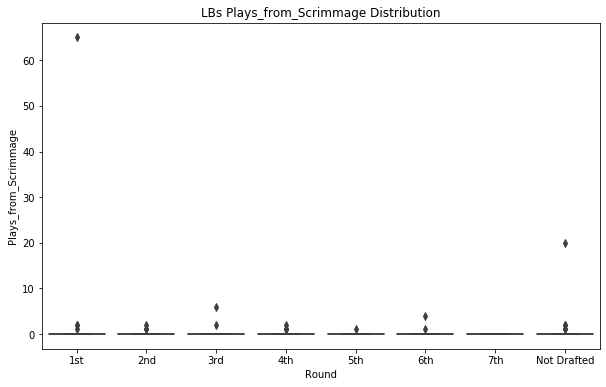

LBs Scrimmage_Yds Summary:
count   681.00
mean      1.61
std      20.90
min      -2.00
25%       0.00
50%       0.00
75%       0.00
max     512.00
Name: Scrimmage_Yds, dtype: float64
----------------------------------------
LBs Scrimmage_Yds by Round
             Scrimmage_Yds
Round                     
1st                  10.62
2nd                   0.90
3rd                   0.25
4th                   1.31
5th                   0.00
6th                   0.20
7th                   0.00
Not Drafted           1.05


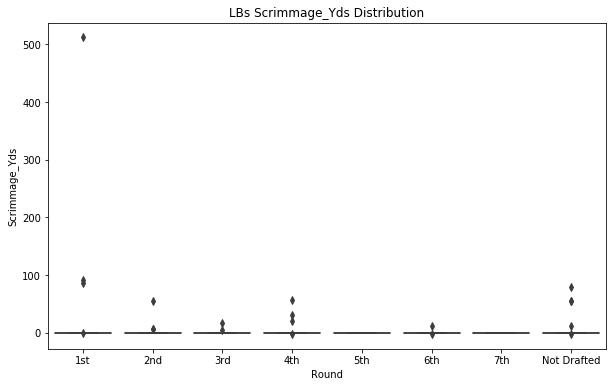

LBs Scrimmage_Yds_per_Attempt Summary:
count   681.00
mean      0.48
std       4.32
min      -2.00
25%       0.00
50%       0.00
75%       0.00
max      57.00
Name: Scrimmage_Yds_per_Attempt, dtype: float64
----------------------------------------
LBs Scrimmage_Yds_per_Attempt by Round
             Scrimmage_Yds_per_Attempt
Round                                 
1st                               1.48
2nd                               0.85
3rd                               0.06
4th                               1.12
5th                               0.00
6th                               0.02
7th                               0.00
Not Drafted                       0.37


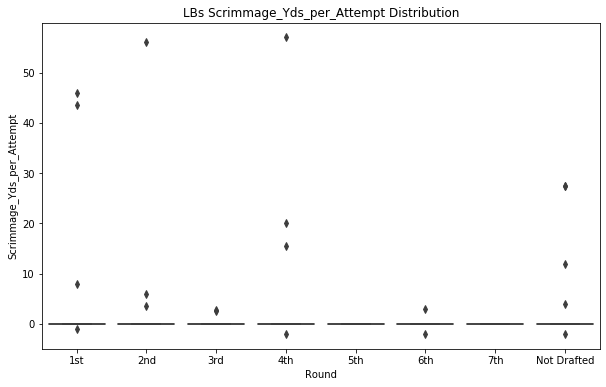

LBs Scrimmage_TDs Summary:
count   681.00
mean      0.01
std       0.14
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       2.00
Name: Scrimmage_TDs, dtype: float64
----------------------------------------
LBs Scrimmage_TDs by Round
             Scrimmage_TDs
Round                     
1st                   0.06
2nd                   0.03
3rd                   0.01
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.01


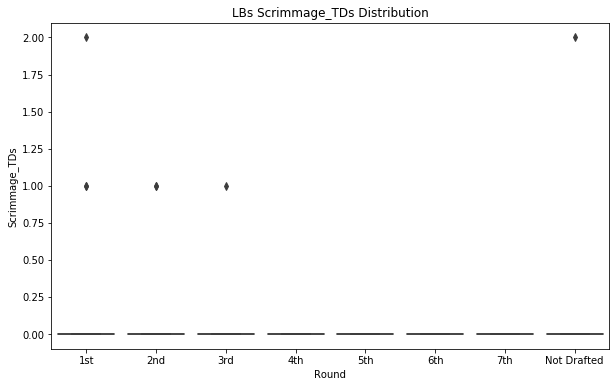

LBs Rush_AttemptsperGame Summary:
count   681.00
mean      0.01
std       0.18
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.36
Name: Rush_AttemptsperGame, dtype: float64
----------------------------------------
LBs Rush_AttemptsperGame by Round
             Rush_AttemptsperGame
Round                            
1st                          0.07
2nd                          0.01
3rd                          0.01
4th                          0.00
5th                          0.00
6th                          0.01
7th                          0.00
Not Drafted                  0.01


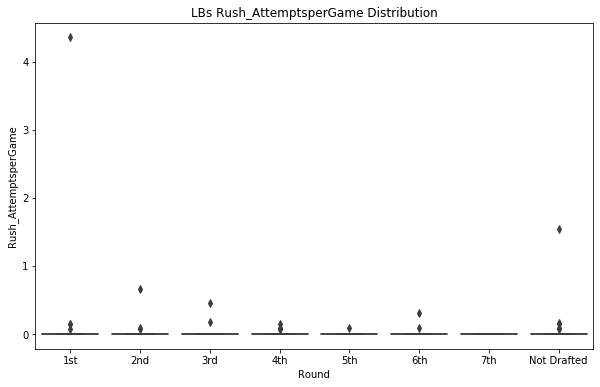

LBs Rush_YdsperGame Summary:
count   681.00
mean      0.12
std       1.37
min      -0.18
25%       0.00
50%       0.00
75%       0.00
max      32.57
Name: Rush_YdsperGame, dtype: float64
----------------------------------------
LBs Rush_YdsperGame by Round
             Rush_YdsperGame
Round                       
1st                     0.71
2nd                     0.10
3rd                     0.02
4th                     0.10
5th                     0.00
6th                     0.01
7th                     0.00
Not Drafted             0.08


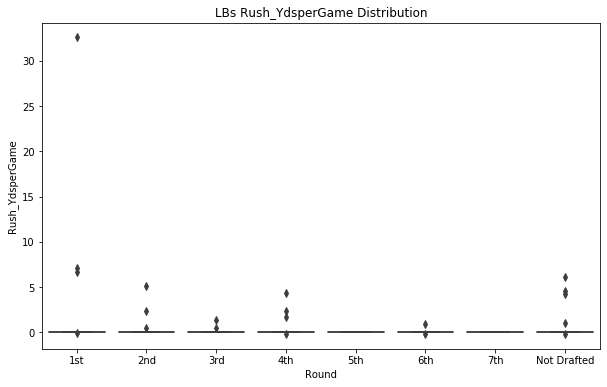

LBs Rush_TDsperGame Summary:
count   681.00
mean      0.00
std       0.02
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.33
Name: Rush_TDsperGame, dtype: float64
----------------------------------------
LBs Rush_TDsperGame by Round
             Rush_TDsperGame
Round                       
1st                     0.00
2nd                     0.01
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


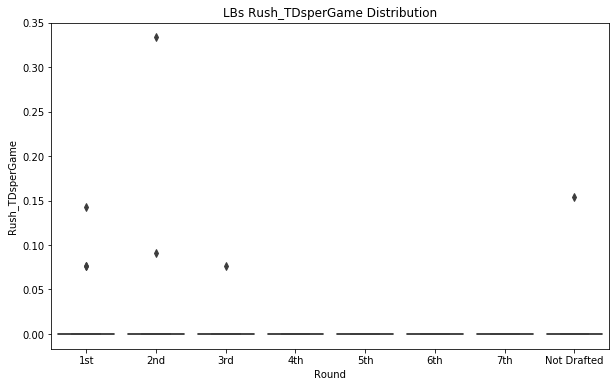

LBs ReceptionsperGame Summary:
count   681.00
mean      0.00
std       0.01
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.29
Name: ReceptionsperGame, dtype: float64
----------------------------------------
LBs ReceptionsperGame by Round
             ReceptionsperGame
Round                         
1st                       0.00
2nd                       0.00
3rd                       0.00
4th                       0.00
5th                       0.00
6th                       0.00
7th                       0.00
Not Drafted               0.00


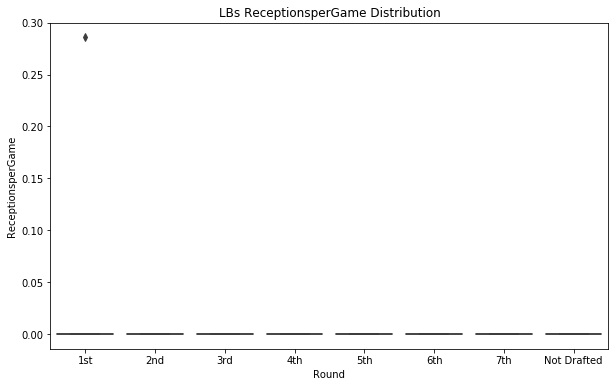

LBs Rec_YdsperGame Summary:
count   681.00
mean      0.01
std       0.15
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.00
Name: Rec_YdsperGame, dtype: float64
----------------------------------------
LBs Rec_YdsperGame by Round
             Rec_YdsperGame
Round                      
1st                    0.06
2nd                    0.00
3rd                    0.00
4th                    0.00
5th                    0.00
6th                    0.00
7th                    0.00
Not Drafted            0.00


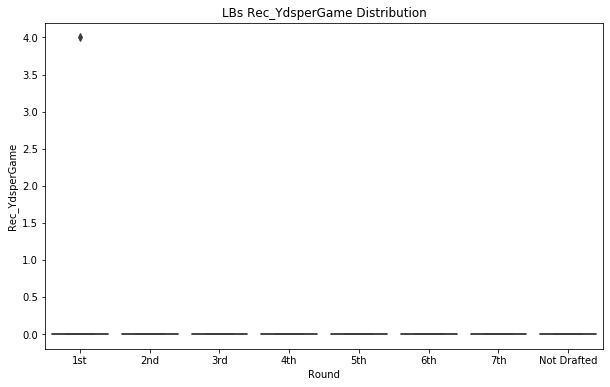

LBs Rec_TDsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Rec_TDsperGame, dtype: float64
----------------------------------------
LBs Rec_TDsperGame by Round
             Rec_TDsperGame
Round                      
1st                    0.00
2nd                    0.00
3rd                    0.00
4th                    0.00
5th                    0.00
6th                    0.00
7th                    0.00
Not Drafted            0.00


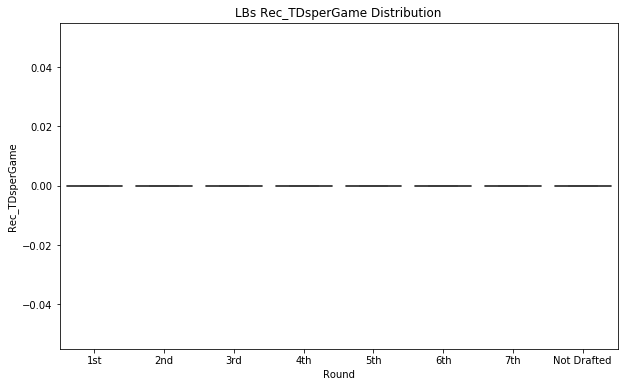

LBs Plays_from_ScrimmageperGame Summary:
count   681.00
mean      0.01
std       0.19
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.64
Name: Plays_from_ScrimmageperGame, dtype: float64
----------------------------------------
LBs Plays_from_ScrimmageperGame by Round
             Plays_from_ScrimmageperGame
Round                                   
1st                                 0.08
2nd                                 0.01
3rd                                 0.01
4th                                 0.00
5th                                 0.00
6th                                 0.01
7th                                 0.00
Not Drafted                         0.01


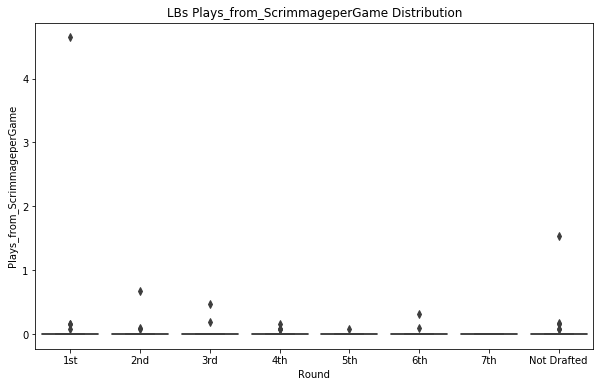

LBs Scrimmage_YdsperGame Summary:
count   681.00
mean      0.12
std       1.52
min      -0.18
25%       0.00
50%       0.00
75%       0.00
max      36.57
Name: Scrimmage_YdsperGame, dtype: float64
----------------------------------------
LBs Scrimmage_YdsperGame by Round
             Scrimmage_YdsperGame
Round                            
1st                          0.77
2nd                          0.10
3rd                          0.02
4th                          0.10
5th                          0.00
6th                          0.01
7th                          0.00
Not Drafted                  0.08


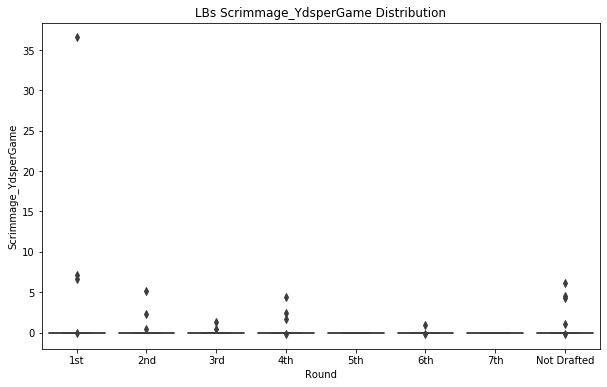

LBs Scrimmage_TDsperGame Summary:
count   681.00
mean      0.00
std       0.02
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.33
Name: Scrimmage_TDsperGame, dtype: float64
----------------------------------------
LBs Scrimmage_TDsperGame by Round
             Scrimmage_TDsperGame
Round                            
1st                          0.00
2nd                          0.01
3rd                          0.00
4th                          0.00
5th                          0.00
6th                          0.00
7th                          0.00
Not Drafted                  0.00


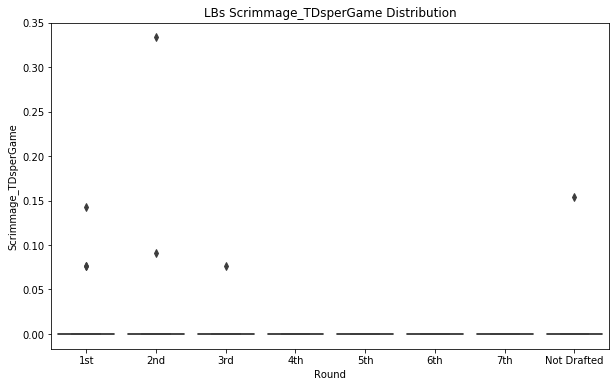

In [25]:
plot_stats('LBs', df, rushing_stats)

In [26]:
for i in rushing_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df, i)
    print('')
    print('*' * 40)

Rush_Rec_Games ANOVA Test:
----------------------------------------
             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00  100.16    14.31 1.39    0.21
Residual 673.00 6926.23    10.29  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.2623    0.9 -1.9053 1.3806  False
   1st         3rd  -0.9483 0.5965 -2.5397 0.6431  False
   1st         4th  -0.6741    0.9 -2.2983 0.9502  False
   1st         5th     -1.0 0.5638 -2.6288 0.6288  False
   1st         6th    -0.62    0.9 -2.4548 1.2148  False
   1st         7th     -1.6 0.1394 -3.4348 0.2348  False
   1st Not Drafted  -0.6899 0.7848 -2.0925 0.7126  False
   2nd         3rd   -0.686 0.8574  -2.204 0.8321  False
   2nd         4th  -0.4117    0.9 -1.9642 1.1407  False
   2nd         5th  -0.7377 0.8178 -2.2948 0.8195  False
   2nd         6th  -0.3577    0.9 -2.1292 1.4139  F

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.8615 0.2487 -1.9585 0.2354  False
   1st         3rd  -0.8615 0.2123 -1.9241  0.201  False
   1st         4th  -0.8615 0.2355  -1.946  0.223  False
   1st         5th  -0.8615 0.2385 -1.9491  0.226  False
   1st         6th  -0.8615 0.3934 -2.0866 0.3635  False
   1st         7th  -0.8615 0.3934 -2.0866 0.3635  False
   1st Not Drafted  -0.8615 0.0972  -1.798 0.0749  False
   2nd         3rd      0.0    0.9 -1.0136 1.0136  False
   2nd         4th      0.0    0.9 -1.0366 1.0366  False
   2nd         5th      0.0    0.9 -1.0397 1.0397  False
   2nd         6th      0.0    0.9 -1.1828 1.1828  False
   2nd         7th      0.0    0.9 -1.1828 1.1828  False
   2nd Not Drafted      0.0    0.9 -0.8805 0.8805  False
   3rd         4th      0.0    0.9 -1.0001 1.0001  False
   3rd         5th      0.0    

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.6324    0.9  -2.842 1.5771  False
   1st         3rd  -1.4235 0.4694 -3.5638 0.7168  False
   1st         4th  -0.3658    0.9 -2.5502 1.8186  False
   1st         5th  -1.4831 0.4458 -3.6736 0.7074  False
   1st         6th  -1.4631 0.6019 -3.9306 1.0045  False
   1st         7th  -1.4831 0.5872 -3.9506 0.9845  False
   1st Not Drafted   -1.118 0.6023 -3.0042 0.7682  False
   2nd         3rd  -0.7911    0.9 -2.8327 1.2505  False
   2nd         4th   0.2666    0.9 -1.8212 2.3545  False
   2nd         5th  -0.8506    0.9 -2.9449 1.2436  False
   2nd         6th  -0.8306    0.9 -3.2131 1.5519  False
   2nd         7th  -0.8506    0.9 -3.2331 1.5319  False
   2nd Not Drafted  -0.4856    0.9  -2.259 1.2879  False
   3rd         4th   1.0577 0.7248 -0.9567 3.0721  False
   3rd         5th  -0.0596    

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.0009    0.9 -0.0074 0.0093  False
   1st         3rd  -0.0037 0.8435 -0.0118 0.0044  False
   1st         4th  -0.0046 0.6698 -0.0128 0.0037  False
   1st         5th  -0.0046 0.6726 -0.0128 0.0037  False
   1st         6th  -0.0046 0.7853 -0.0138 0.0047  False
   1st         7th  -0.0046 0.7853 -0.0138 0.0047  False
   1st Not Drafted  -0.0038 0.7186 -0.0108 0.0033  False
   2nd         3rd  -0.0046 0.5804 -0.0123  0.003  False
   2nd         4th  -0.0055 0.3971 -0.0134 0.0023  False
   2nd         5th  -0.0055 0.4013 -0.0134 0.0024  False
   2nd         6th  -0.0055 0.5625 -0.0145 0.0035  False
   2nd         7th  -0.0055 0.5625 -0.0145 0.0035  False
   2nd Not Drafted  -0.0047 0.3924 -0.0114  0.002  False
   3rd         4th  -0.0009    0.9 -0.0084 0.0067  False
   3rd         5th  -0.0009    

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd  -0.6709 0.1426 -1.4429  0.1012  False
   1st         3rd  -0.7535 0.0468 -1.5013 -0.0057   True
   1st         4th   -0.671 0.1322 -1.4343  0.0922  False
   1st         5th  -0.7733 0.0457 -1.5387 -0.0079   True
   1st         6th  -0.7585 0.1317 -1.6206  0.1037  False
   1st         7th  -0.7733 0.1166 -1.6355  0.0889  False
   1st Not Drafted    -0.69 0.0327 -1.3491  -0.031   True
   2nd         3rd  -0.0826    0.9  -0.796  0.6307  False
   2nd         4th  -0.0002    0.9 -0.7297  0.7293  False
   2nd         5th  -0.1024    0.9 -0.8341  0.6293  False
   2nd         6th  -0.0876    0.9   -0.92  0.7449  False
   2nd         7th  -0.1024    0.9 -0.9349    0.73  False
   2nd Not Drafted  -0.0191    0.9 -0.6388  0.6005  False
   3rd         4th   0.0824    0.9 -0.6214  0.7863  False
   3rd        

### College Stats - Defense

In [27]:
defense_stats = ['Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                 'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes', 
                 'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles', 
                 'Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                 'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                 'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                 'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame']

In [28]:
df[defense_stats].describe()

,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,11.52,37.02,29.36,66.38,7.92,2.96,0.90,13.80,8.90,0.14,1.45,0.35,2.54,0.08,0.66,inf,inf,inf,inf,inf,0.08,1.19,0.01,inf,0.03,0.20,0.01,inf
std,3.01,24.67,20.99,43.05,5.94,3.10,1.06,23.26,14.46,0.38,2.03,0.74,13.32,0.31,1.09,nan,nan,nan,nan,nan,0.09,2.40,0.03,nan,0.06,1.05,0.03,nan
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-3.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.38,0.00,0.00,0.00,-0.08,0.00,0.00
25%,11.00,21.00,13.00,40.00,3.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.29,3.57,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,12.00,39.00,29.00,71.00,7.50,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.30,2.47,6.00,0.68,0.19,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,13.00,54.00,44.00,99.00,12.00,4.50,1.00,22.00,14.00,0.00,2.00,0.00,0.00,0.00,1.00,4.50,3.75,8.25,1.00,0.38,0.10,1.69,0.00,0.23,0.00,0.00,0.00,0.08
max,15.00,114.00,97.00,191.00,28.50,19.00,7.00,147.00,88.00,2.00,11.00,4.00,184.00,3.00,6.00,inf,inf,inf,inf,inf,0.60,36.50,0.40,inf,0.40,13.14,0.21,inf


LBs Defense_Games Summary:
count   681.00
mean     11.52
std       3.01
min       0.00
25%      11.00
50%      12.00
75%      13.00
max      15.00
Name: Defense_Games, dtype: float64
----------------------------------------
LBs Defense_Games by Round
             Defense_Games
Round                     
1st                  11.45
2nd                  12.12
3rd                  11.81
4th                  11.78
5th                  11.88
6th                  11.28
7th                  11.04
Not Drafted          11.10


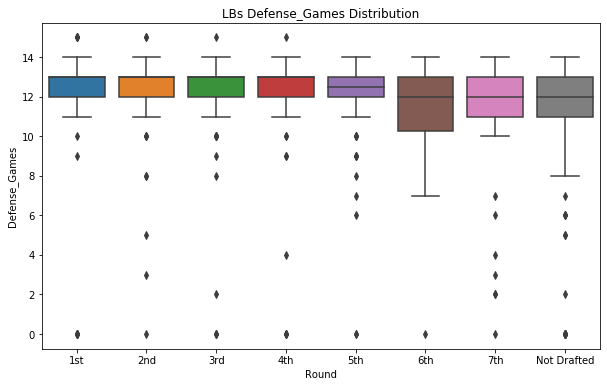

LBs Solo_Tackles Summary:
count   681.00
mean     37.02
std      24.67
min       0.00
25%      21.00
50%      39.00
75%      54.00
max     114.00
Name: Solo_Tackles, dtype: float64
----------------------------------------
LBs Solo_Tackles by Round
             Solo_Tackles
Round                    
1st                 40.46
2nd                 34.10
3rd                 37.20
4th                 38.43
5th                 37.84
6th                 40.06
7th                 34.28
Not Drafted         35.91


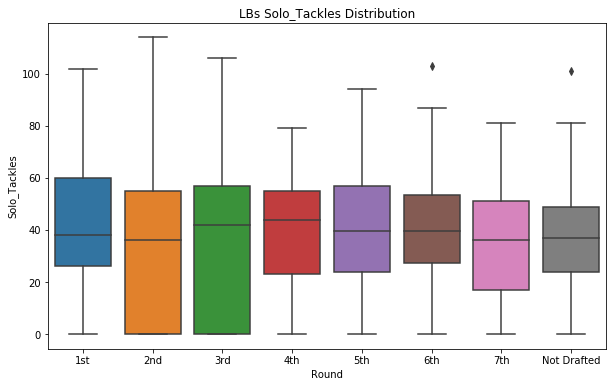

LBs Assisted_Tackles Summary:
count   681.00
mean     29.36
std      20.99
min       0.00
25%      13.00
50%      29.00
75%      44.00
max      97.00
Name: Assisted_Tackles, dtype: float64
----------------------------------------
LBs Assisted_Tackles by Round
             Assisted_Tackles
Round                        
1st                     28.14
2nd                     25.44
3rd                     28.90
4th                     30.53
5th                     30.23
6th                     32.14
7th                     26.14
Not Drafted             30.84


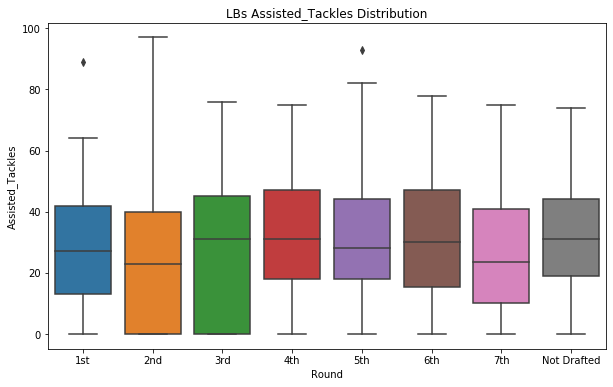

LBs Ttl_Tackles Summary:
count   681.00
mean     66.38
std      43.05
min       0.00
25%      40.00
50%      71.00
75%      99.00
max     191.00
Name: Ttl_Tackles, dtype: float64
----------------------------------------
LBs Ttl_Tackles by Round
             Ttl_Tackles
Round                   
1st                68.60
2nd                59.55
3rd                66.10
4th                68.96
5th                68.06
6th                72.20
7th                60.42
Not Drafted        66.75


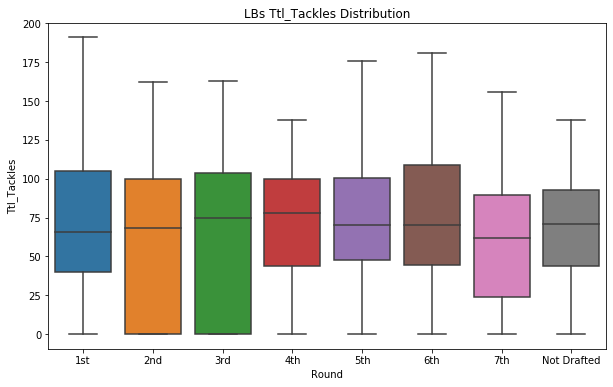

LBs Loss Summary:
count   681.00
mean      7.92
std       5.94
min       0.00
25%       3.50
50%       7.50
75%      12.00
max      28.50
Name: Loss, dtype: float64
----------------------------------------
LBs Loss by Round
             Loss
Round            
1st         10.94
2nd          7.44
3rd          8.15
4th          8.41
5th          7.75
6th          7.74
7th          7.17
Not Drafted  7.07


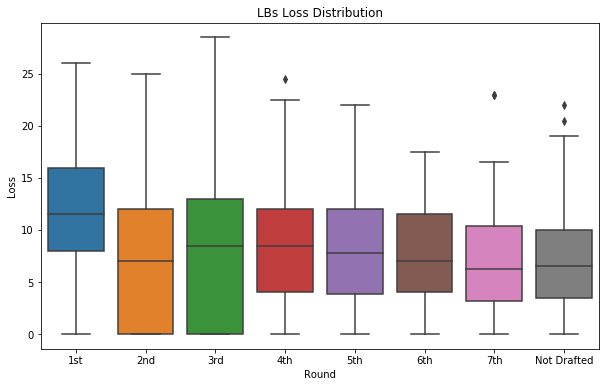

LBs Sacks Summary:
count   681.00
mean      2.96
std       3.10
min       0.00
25%       0.00
50%       2.00
75%       4.50
max      19.00
Name: Sacks, dtype: float64
----------------------------------------
LBs Sacks by Round
             Sacks
Round             
1st           4.54
2nd           3.08
3rd           3.04
4th           2.93
5th           3.03
6th           2.39
7th           2.96
Not Drafted   2.46


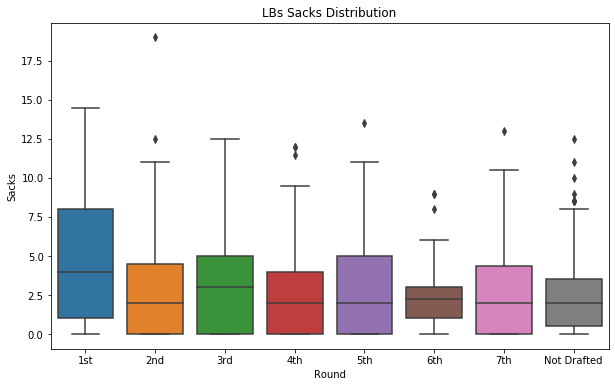

LBs Defensive_Interceptions Summary:
count   681.00
mean      0.90
std       1.06
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       7.00
Name: Defensive_Interceptions, dtype: float64
----------------------------------------
LBs Defensive_Interceptions by Round
             Defensive_Interceptions
Round                               
1st                             0.69
2nd                             1.21
3rd                             0.85
4th                             0.99
5th                             0.82
6th                             1.06
7th                             0.82
Not Drafted                     0.83


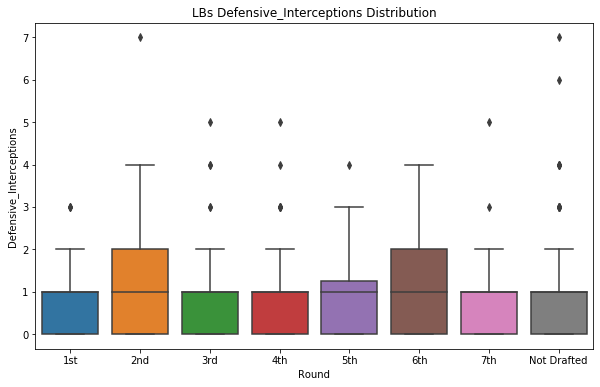

LBs Def_Int_Yds Summary:
count   681.00
mean     13.80
std      23.26
min      -5.00
25%       0.00
50%       0.00
75%      22.00
max     147.00
Name: Def_Int_Yds, dtype: float64
----------------------------------------
LBs Def_Int_Yds by Round
             Def_Int_Yds
Round                   
1st                11.49
2nd                21.05
3rd                13.57
4th                10.93
5th                13.28
6th                17.92
7th                13.08
Not Drafted        12.29


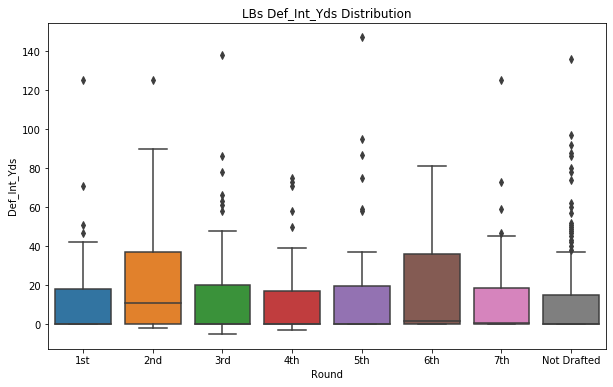

LBs Yds_per_Int Summary:
count   681.00
mean      8.90
std      14.46
min      -3.00
25%       0.00
50%       0.00
75%      14.00
max      88.00
Name: Yds_per_Int, dtype: float64
----------------------------------------
LBs Yds_per_Int by Round
             Yds_per_Int
Round                   
1st                 8.14
2nd                12.45
3rd                 8.06
4th                 7.77
5th                 8.54
6th                10.54
7th                 9.11
Not Drafted         8.25


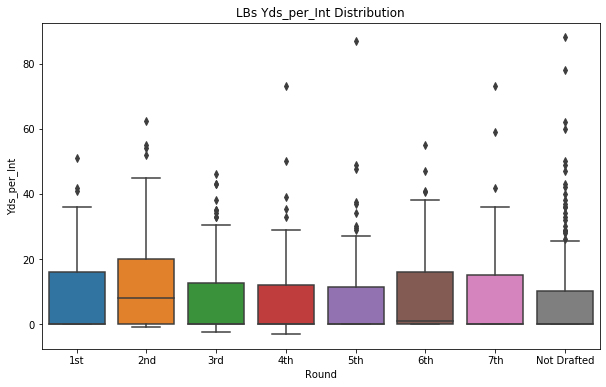

LBs Pick_6 Summary:
count   681.00
mean      0.14
std       0.38
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       2.00
Name: Pick_6, dtype: float64
----------------------------------------
LBs Pick_6 by Round
             Pick_6
Round              
1st            0.14
2nd            0.22
3rd            0.18
4th            0.11
5th            0.15
6th            0.16
7th            0.08
Not Drafted    0.11


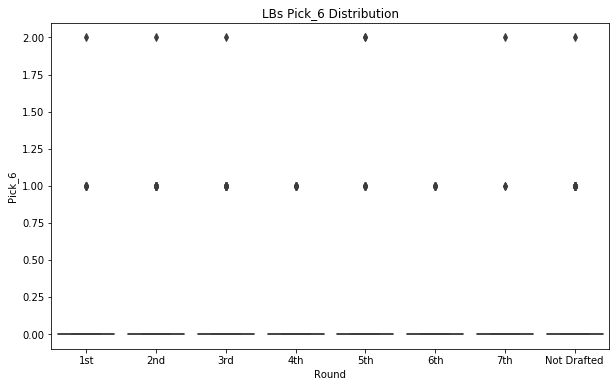

LBs Defended_Passes Summary:
count   681.00
mean      1.45
std       2.03
min       0.00
25%       0.00
50%       0.00
75%       2.00
max      11.00
Name: Defended_Passes, dtype: float64
----------------------------------------
LBs Defended_Passes by Round
             Defended_Passes
Round                       
1st                     1.71
2nd                     1.14
3rd                     1.65
4th                     1.42
5th                     1.66
6th                     1.30
7th                     1.52
Not Drafted             1.33


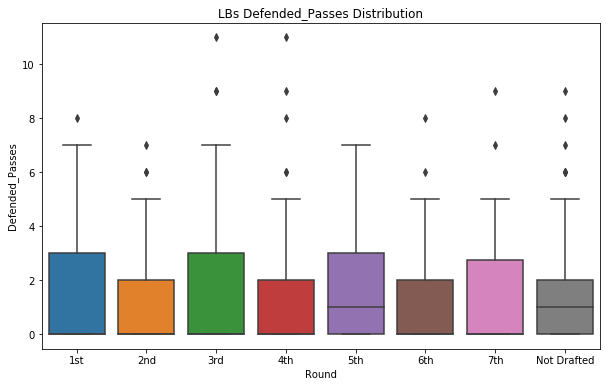

LBs Recovered_Fumbles Summary:
count   681.00
mean      0.35
std       0.74
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.00
Name: Recovered_Fumbles, dtype: float64
----------------------------------------
LBs Recovered_Fumbles by Round
             Recovered_Fumbles
Round                         
1st                       0.42
2nd                       0.39
3rd                       0.47
4th                       0.25
5th                       0.49
6th                       0.34
7th                       0.24
Not Drafted               0.28


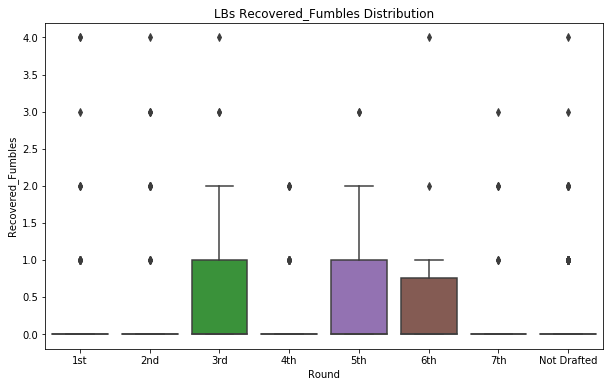

LBs Rec_Fumbles_Yds Summary:
count   681.00
mean      2.54
std      13.32
min      -1.00
25%       0.00
50%       0.00
75%       0.00
max     184.00
Name: Rec_Fumbles_Yds, dtype: float64
----------------------------------------
LBs Rec_Fumbles_Yds by Round
             Rec_Fumbles_Yds
Round                       
1st                     5.25
2nd                     2.92
3rd                     3.11
4th                     2.05
5th                     3.11
6th                     0.24
7th                     1.70
Not Drafted             1.98


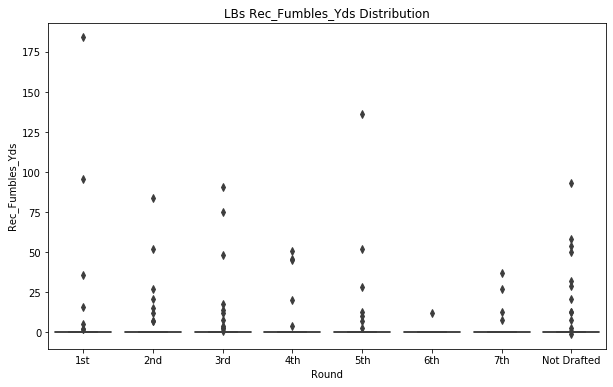

LBs Fumbles_Returned_TD Summary:
count   681.00
mean      0.08
std       0.31
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       3.00
Name: Fumbles_Returned_TD, dtype: float64
----------------------------------------
LBs Fumbles_Returned_TD by Round
             Fumbles_Returned_TD
Round                           
1st                         0.15
2nd                         0.09
3rd                         0.11
4th                         0.04
5th                         0.10
6th                         0.02
7th                         0.10
Not Drafted                 0.07


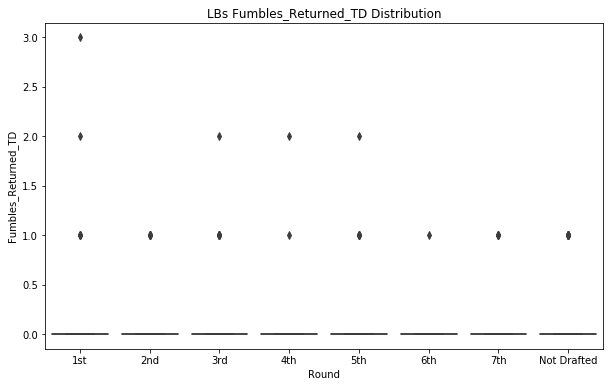

LBs Forced_Fumbles Summary:
count   681.00
mean      0.66
std       1.09
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       6.00
Name: Forced_Fumbles, dtype: float64
----------------------------------------
LBs Forced_Fumbles by Round
             Forced_Fumbles
Round                      
1st                    0.98
2nd                    0.65
3rd                    0.61
4th                    0.64
5th                    0.74
6th                    0.64
7th                    0.60
Not Drafted            0.57


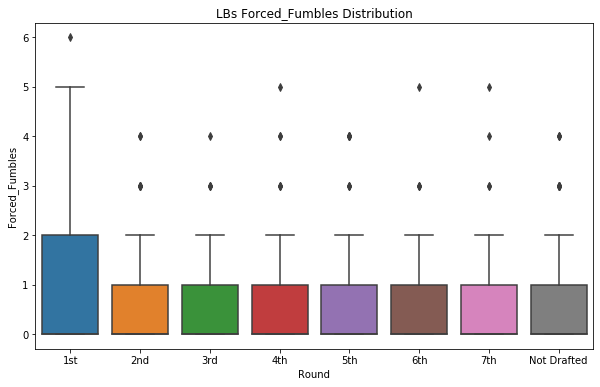

LBs Solo_TacklesperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       2.00
50%       3.30
75%       4.50
max        inf
Name: Solo_TacklesperGame, dtype: float64
----------------------------------------
LBs Solo_TacklesperGame by Round
             Solo_TacklesperGame
Round                           
1st                          inf
2nd                          inf
3rd                          inf
4th                          inf
5th                         3.11
6th                          inf
7th                          inf
Not Drafted                  inf


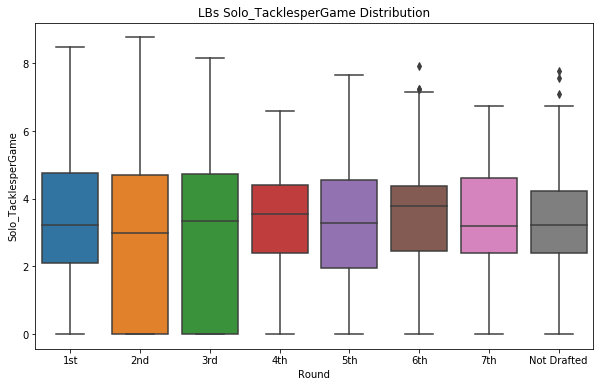

LBs Assisted_TacklesperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       1.29
50%       2.47
75%       3.75
max        inf
Name: Assisted_TacklesperGame, dtype: float64
----------------------------------------
LBs Assisted_TacklesperGame by Round
             Assisted_TacklesperGame
Round                               
1st                              inf
2nd                              inf
3rd                              inf
4th                              inf
5th                             2.49
6th                              inf
7th                              inf
Not Drafted                      inf


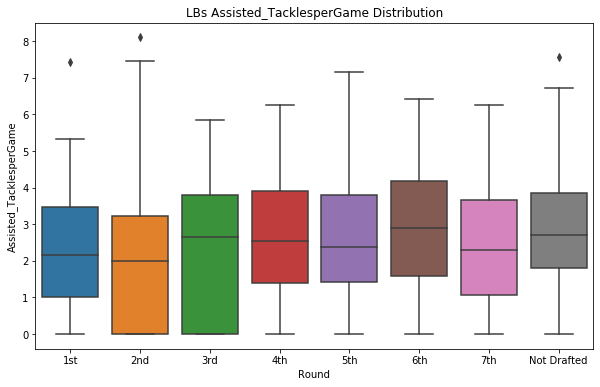

LBs Ttl_TacklesperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       3.57
50%       6.00
75%       8.25
max        inf
Name: Ttl_TacklesperGame, dtype: float64
----------------------------------------
LBs Ttl_TacklesperGame by Round
             Ttl_TacklesperGame
Round                          
1st                         inf
2nd                         inf
3rd                         inf
4th                         inf
5th                        5.60
6th                         inf
7th                         inf
Not Drafted                 inf


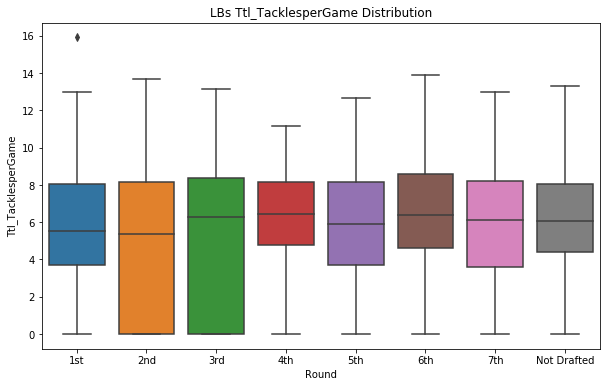

LBs LossperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       0.33
50%       0.68
75%       1.00
max        inf
Name: LossperGame, dtype: float64
----------------------------------------
LBs LossperGame by Round
             LossperGame
Round                   
1st                  inf
2nd                  inf
3rd                  inf
4th                  inf
5th                 0.63
6th                  inf
7th                  inf
Not Drafted          inf


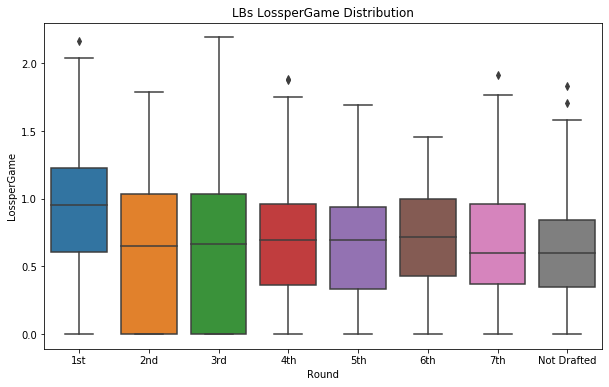

LBs SacksperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       0.00
50%       0.19
75%       0.38
max        inf
Name: SacksperGame, dtype: float64
----------------------------------------
LBs SacksperGame by Round
             SacksperGame
Round                    
1st                   inf
2nd                   inf
3rd                   inf
4th                   inf
5th                  0.24
6th                   inf
7th                   inf
Not Drafted           inf


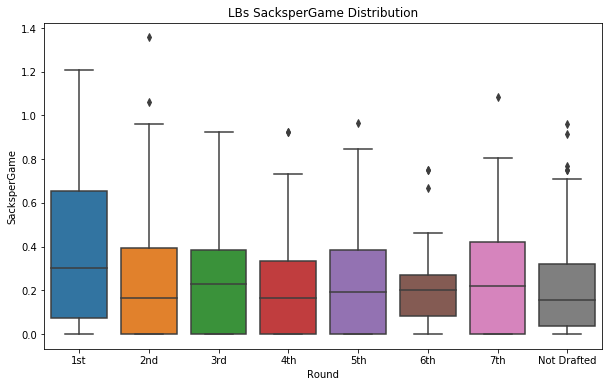

LBs Defensive_InterceptionsperGame Summary:
count   681.00
mean      0.08
std       0.09
min       0.00
25%       0.00
50%       0.08
75%       0.10
max       0.60
Name: Defensive_InterceptionsperGame, dtype: float64
----------------------------------------
LBs Defensive_InterceptionsperGame by Round
             Defensive_InterceptionsperGame
Round                                      
1st                                    0.05
2nd                                    0.10
3rd                                    0.07
4th                                    0.08
5th                                    0.07
6th                                    0.09
7th                                    0.08
Not Drafted                            0.07


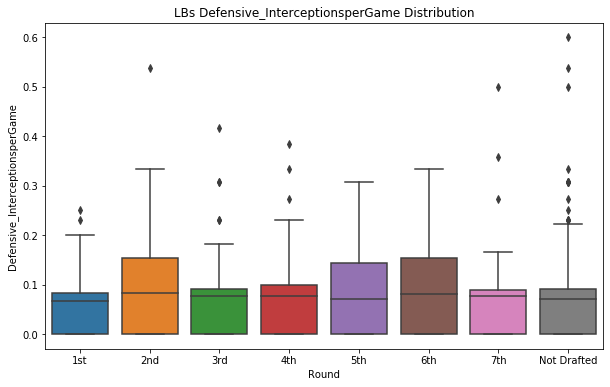

LBs Def_Int_YdsperGame Summary:
count   681.00
mean      1.19
std       2.40
min      -0.38
25%       0.00
50%       0.00
75%       1.69
max      36.50
Name: Def_Int_YdsperGame, dtype: float64
----------------------------------------
LBs Def_Int_YdsperGame by Round
             Def_Int_YdsperGame
Round                          
1st                        0.89
2nd                        1.78
3rd                        1.11
4th                        0.87
5th                        1.05
6th                        1.52
7th                        1.69
Not Drafted                1.08


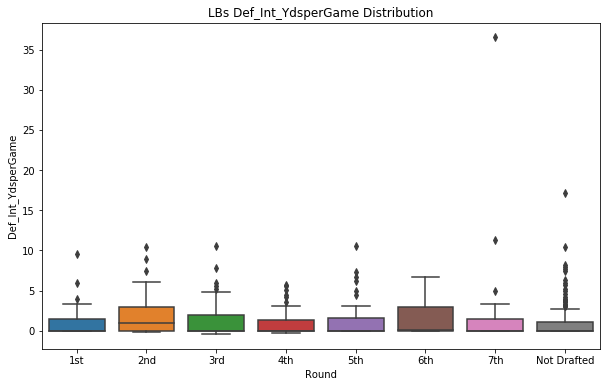

LBs Pick_6perGame Summary:
count   681.00
mean      0.01
std       0.03
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.40
Name: Pick_6perGame, dtype: float64
----------------------------------------
LBs Pick_6perGame by Round
             Pick_6perGame
Round                     
1st                   0.01
2nd                   0.02
3rd                   0.01
4th                   0.01
5th                   0.01
6th                   0.01
7th                   0.01
Not Drafted           0.01


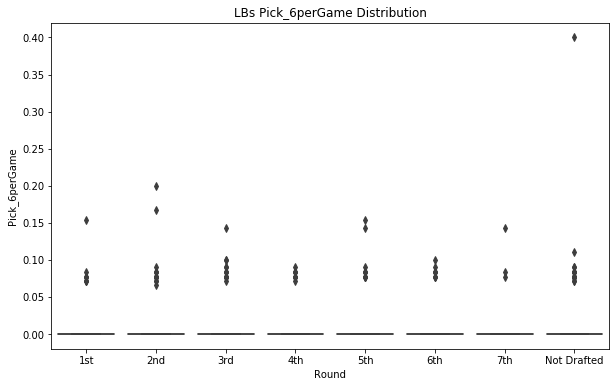

LBs Defended_PassesperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       0.00
50%       0.00
75%       0.23
max        inf
Name: Defended_PassesperGame, dtype: float64
----------------------------------------
LBs Defended_PassesperGame by Round
             Defended_PassesperGame
Round                              
1st                             inf
2nd                             inf
3rd                             inf
4th                             inf
5th                            0.14
6th                             inf
7th                             inf
Not Drafted                     inf


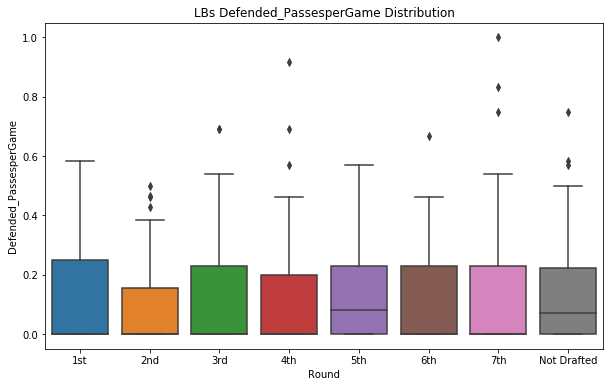

LBs Recovered_FumblesperGame Summary:
count   681.00
mean      0.03
std       0.06
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.40
Name: Recovered_FumblesperGame, dtype: float64
----------------------------------------
LBs Recovered_FumblesperGame by Round
             Recovered_FumblesperGame
Round                                
1st                              0.03
2nd                              0.03
3rd                              0.04
4th                              0.02
5th                              0.04
6th                              0.03
7th                              0.02
Not Drafted                      0.02


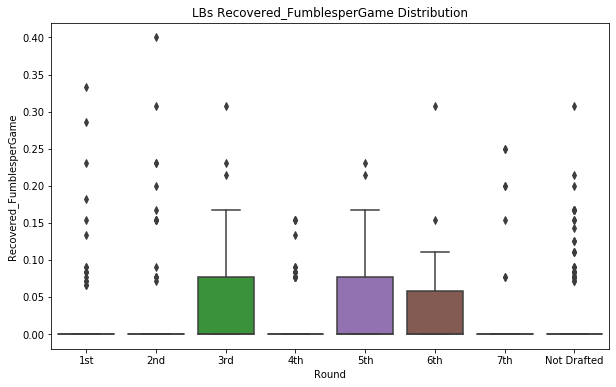

LBs Rec_Fumbles_YdsperGame Summary:
count   681.00
mean      0.20
std       1.05
min      -0.08
25%       0.00
50%       0.00
75%       0.00
max      13.14
Name: Rec_Fumbles_YdsperGame, dtype: float64
----------------------------------------
LBs Rec_Fumbles_YdsperGame by Round
             Rec_Fumbles_YdsperGame
Round                              
1st                            0.39
2nd                            0.23
3rd                            0.25
4th                            0.18
5th                            0.26
6th                            0.02
7th                            0.14
Not Drafted                    0.16


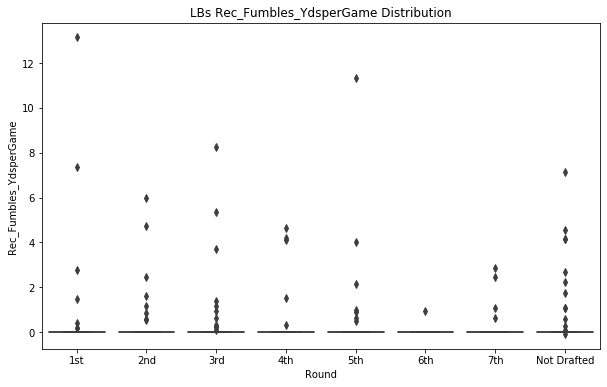

LBs Fumbles_Returned_TDperGame Summary:
count   681.00
mean      0.01
std       0.03
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.21
Name: Fumbles_Returned_TDperGame, dtype: float64
----------------------------------------
LBs Fumbles_Returned_TDperGame by Round
             Fumbles_Returned_TDperGame
Round                                  
1st                                0.01
2nd                                0.01
3rd                                0.01
4th                                0.00
5th                                0.01
6th                                0.00
7th                                0.01
Not Drafted                        0.01


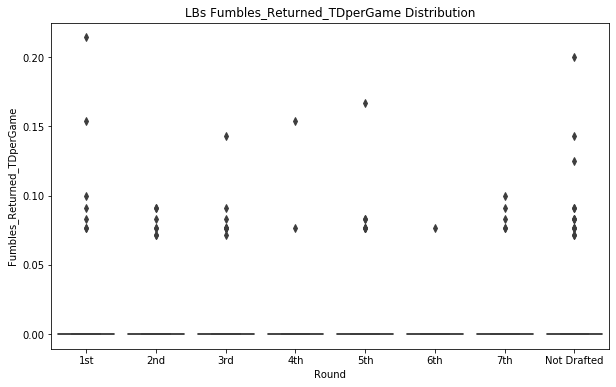

LBs Forced_FumblesperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       0.00
50%       0.00
75%       0.08
max        inf
Name: Forced_FumblesperGame, dtype: float64
----------------------------------------
LBs Forced_FumblesperGame by Round
             Forced_FumblesperGame
Round                             
1st                            inf
2nd                            inf
3rd                           0.05
4th                            inf
5th                           0.06
6th                           0.06
7th                            inf
Not Drafted                    inf


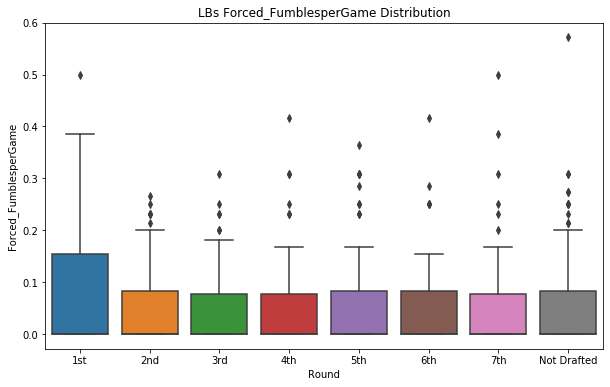

In [29]:
plot_stats('LBs', df, defense_stats)

In [30]:
for i in defense_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df, i)
    print('')
    print('*' * 40)

Defense_Games ANOVA Test:
----------------------------------------
             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00   98.34    14.05 1.56    0.14
Residual 673.00 6055.60     9.00  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.6707 0.8851 -0.8655 2.2069  False
   1st         3rd   0.3628    0.9 -1.1252 1.8509  False
   1st         4th   0.3316    0.9 -1.1871 1.8504  False
   1st         5th   0.4288    0.9 -1.0941 1.9518  False
   1st         6th  -0.1662    0.9 -1.8818 1.5494  False
   1st         7th  -0.4062    0.9 -2.1218 1.3094  False
   1st Not Drafted  -0.3456    0.9  -1.657 0.9658  False
   2nd         3rd  -0.3079    0.9 -1.7274 1.1116  False
   2nd         4th  -0.3391    0.9 -1.7907 1.1125  False
   2nd         5th  -0.2419    0.9 -1.6979 1.2141  False
   2nd         6th  -0.8369 0.7608 -2.4933 0.8196  Fa

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd  -3.4969 0.0101  -6.501 -0.4928   True
   1st         3rd  -2.7868 0.0721 -5.6967  0.1231  False
   1st         4th  -2.5249 0.1633 -5.4948   0.445  False
   1st         5th  -3.1885 0.0261 -6.1666 -0.2103   True
   1st         6th  -3.1985 0.0747 -6.5533  0.1564  False
   1st         7th  -3.7685 0.0155 -7.1233 -0.4136   True
   1st Not Drafted  -3.8644  0.001 -6.4289 -1.2999   True
   2nd         3rd   0.7101    0.9 -2.0656  3.4859  False
   2nd         4th    0.972    0.9 -1.8666  3.8107  False
   2nd         5th   0.3084    0.9 -2.5388  3.1557  False
   2nd         6th   0.2984    0.9 -2.9408  3.5377  False
   2nd         7th  -0.2716    0.9 -3.5108  2.9677  False
   2nd Not Drafted  -0.3675    0.9 -2.7787  2.0437  False
   3rd         4th   0.2619    0.9 -2.4769  3.0007  False
   3rd        

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
   1st         2nd   4.3137 0.6207  -3.0911 11.7186  False
   1st         3rd  -0.0819    0.9  -7.2546  7.0909  False
   1st         4th  -0.3703    0.9   -7.691  6.9504  False
   1st         5th   0.4006    0.9  -6.9405  7.7416  False
   1st         6th   2.4071    0.9  -5.8625 10.6766  False
   1st         7th   0.9751    0.9  -7.2945  9.2446  False
   1st Not Drafted   0.1123    0.9   -6.209  6.4336  False
   2nd         3rd  -4.3956 0.5122 -11.2377  2.4465  False
   2nd         4th   -4.684 0.4609 -11.6811  2.3131  False
   2nd         5th  -3.9131  0.666 -10.9315  3.1052  False
   2nd         6th  -1.9066    0.9  -9.8911  6.0778  False
   2nd         7th  -3.3386    0.9 -11.3231  4.6458  False
   2nd Not Drafted  -4.2014 0.3862 -10.1449   1.742  False
   3rd         4th  -0.2884    0.9  -7.0393  6.4625  Fal

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd  -2.3241    0.9  -9.1571  4.509  False
   1st         3rd  -2.1338    0.9  -8.7526  4.485  False
   1st         4th  -3.1968 0.8187  -9.9522 3.5586  False
   1st         5th  -2.1337    0.9  -8.9078 4.6405  False
   1st         6th  -5.0062  0.487 -12.6371 2.6248  False
   1st         7th  -3.5462 0.8342 -11.1771 4.0848  False
   1st Not Drafted  -3.2673 0.6613  -9.1005 2.5658  False
   2nd         3rd   0.1903    0.9  -6.1235  6.504  False
   2nd         4th  -0.8727    0.9  -7.3294  5.584  False
   2nd         5th   0.1904    0.9   -6.286 6.6668  False
   2nd         6th  -2.6821    0.9   -10.05 4.6858  False
   2nd         7th  -1.2221    0.9    -8.59 6.1458  False
   2nd Not Drafted  -0.9432    0.9  -6.4277 4.5413  False
   3rd         4th   -1.063    0.9  -7.2926 5.1666  False
   3rd        

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      nan 0.5566   nan   nan  False
   1st         3rd      nan 0.5566   nan   nan  False
   1st         4th      nan 0.5566   nan   nan  False
  


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      nan 0.5566   nan   nan  False
   1st         3rd      nan 0.5566   nan   nan  False
   1s


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      nan 0.5566   nan   nan  False
   1st         3rd      nan 0.5566   nan   nan  False
   1s


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      nan 0.5566   nan   nan  False
   1st         3rd     -inf 0.5566   nan   nan  False
   1st         4th      nan 0.5566   nan   nan  False
   1st         5th     -inf 0.5566   nan   nan  False
   1st         6th    

### College Stats - Kicking

In [31]:
kicking_stats = ['Kicking_Games', 'XP_Made', 'XP_Attempts', 'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent', 
                 'TTL_Kicking_Points', 'NumPunts', 'Punt_Yds', 'Yds_per_Punt', 'XP_MadeperGame', 'XP_AttemptsperGame',
                 'FG_MadeperGame', 'FG_AttemptsperGame', 'TTL_Kicking_PointsperGame', 'NumPuntsperGame', 
                 'Punt_YdsperGame']

In [32]:
df[kicking_stats].describe()

,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


LBs Kicking_Games Summary:
count   681.00
mean      0.02
std       0.46
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      12.00
Name: Kicking_Games, dtype: float64
----------------------------------------
LBs Kicking_Games by Round
             Kicking_Games
Round                     
1st                   0.00
2nd                   0.00
3rd                   0.13
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


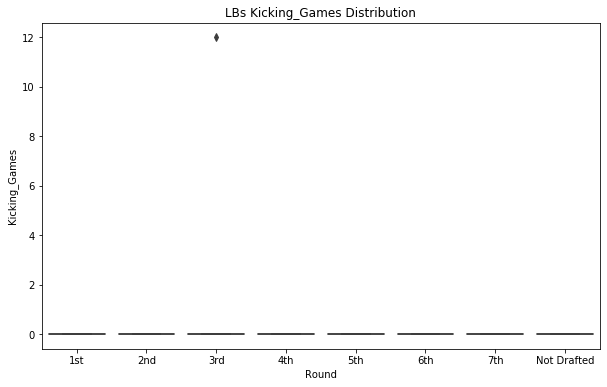

LBs XP_Made Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: XP_Made, dtype: float64
----------------------------------------
LBs XP_Made by Round
             XP_Made
Round               
1st             0.00
2nd             0.00
3rd             0.00
4th             0.00
5th             0.00
6th             0.00
7th             0.00
Not Drafted     0.00


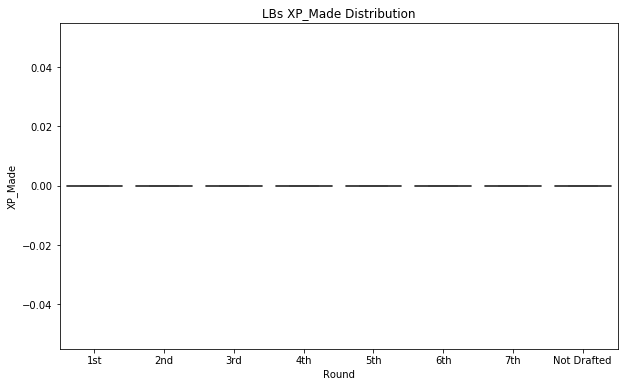

LBs XP_Attempts Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: XP_Attempts, dtype: float64
----------------------------------------
LBs XP_Attempts by Round
             XP_Attempts
Round                   
1st                 0.00
2nd                 0.00
3rd                 0.00
4th                 0.00
5th                 0.00
6th                 0.00
7th                 0.00
Not Drafted         0.00


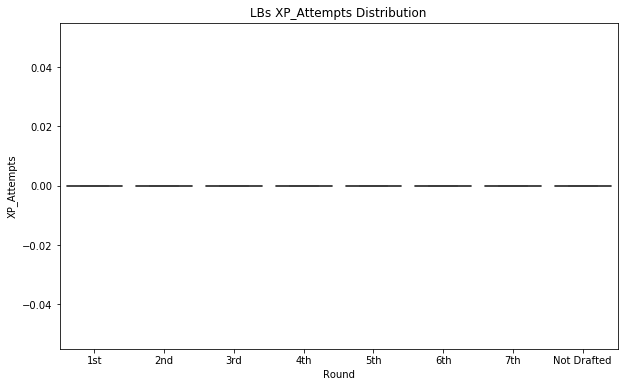

LBs XP_Percent Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: XP_Percent, dtype: float64
----------------------------------------
LBs XP_Percent by Round
             XP_Percent
Round                  
1st                0.00
2nd                0.00
3rd                0.00
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        0.00


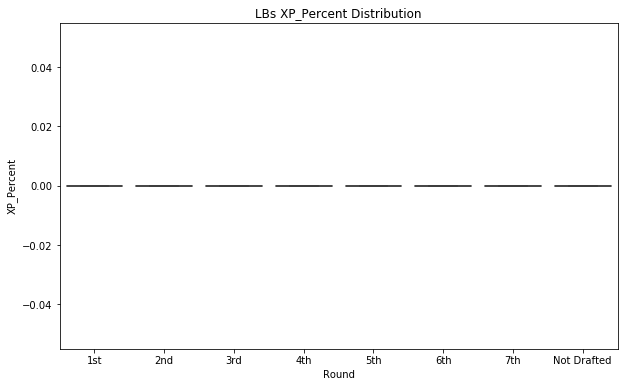

LBs FG_Made Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: FG_Made, dtype: float64
----------------------------------------
LBs FG_Made by Round
             FG_Made
Round               
1st             0.00
2nd             0.00
3rd             0.00
4th             0.00
5th             0.00
6th             0.00
7th             0.00
Not Drafted     0.00


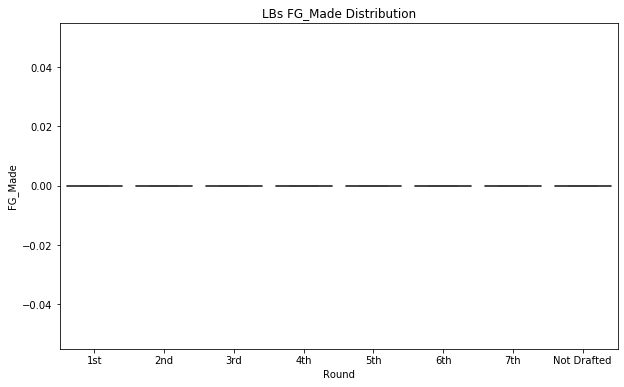

LBs FG_Attempts Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: FG_Attempts, dtype: float64
----------------------------------------
LBs FG_Attempts by Round
             FG_Attempts
Round                   
1st                 0.00
2nd                 0.00
3rd                 0.00
4th                 0.00
5th                 0.00
6th                 0.00
7th                 0.00
Not Drafted         0.00


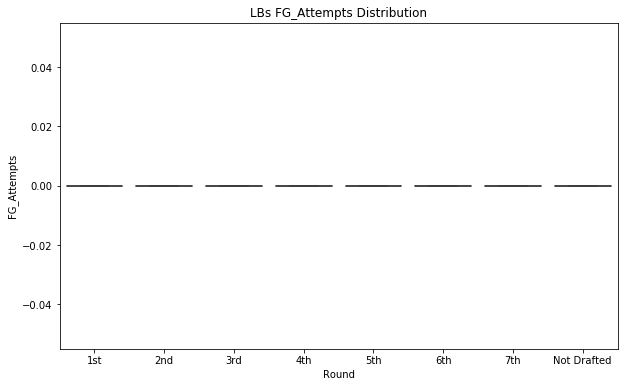

LBs FG_Percent Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: FG_Percent, dtype: float64
----------------------------------------
LBs FG_Percent by Round
             FG_Percent
Round                  
1st                0.00
2nd                0.00
3rd                0.00
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        0.00


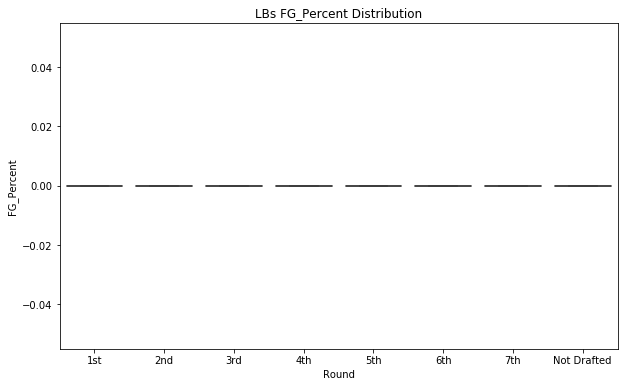

LBs TTL_Kicking_Points Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: TTL_Kicking_Points, dtype: float64
----------------------------------------
LBs TTL_Kicking_Points by Round
             TTL_Kicking_Points
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


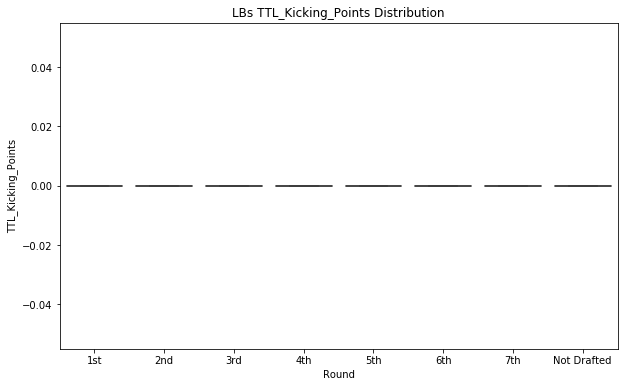

LBs NumPunts Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: NumPunts, dtype: float64
----------------------------------------
LBs NumPunts by Round
             NumPunts
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


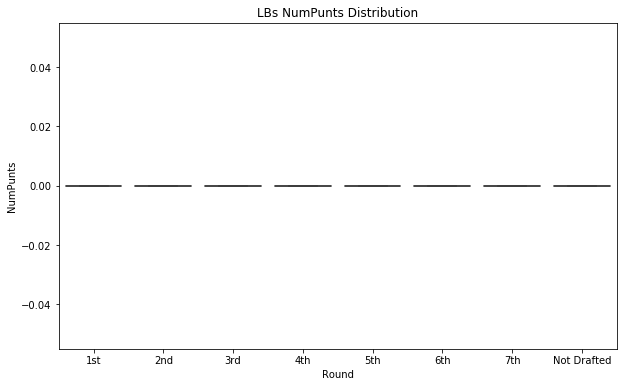

LBs Punt_Yds Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Punt_Yds, dtype: float64
----------------------------------------
LBs Punt_Yds by Round
             Punt_Yds
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


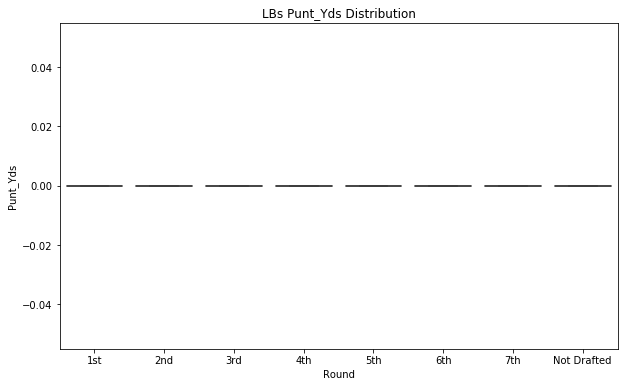

LBs Yds_per_Punt Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Yds_per_Punt, dtype: float64
----------------------------------------
LBs Yds_per_Punt by Round
             Yds_per_Punt
Round                    
1st                  0.00
2nd                  0.00
3rd                  0.00
4th                  0.00
5th                  0.00
6th                  0.00
7th                  0.00
Not Drafted          0.00


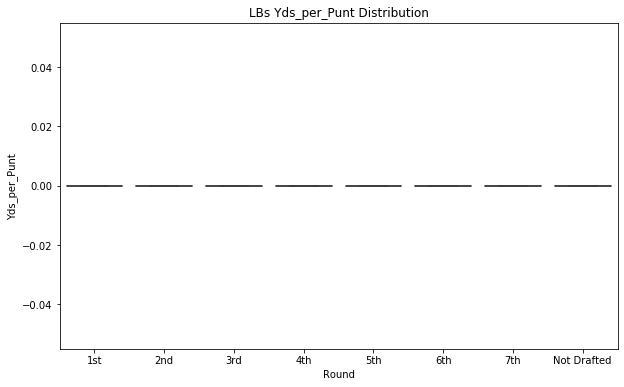

LBs XP_MadeperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: XP_MadeperGame, dtype: float64
----------------------------------------
LBs XP_MadeperGame by Round
             XP_MadeperGame
Round                      
1st                    0.00
2nd                    0.00
3rd                    0.00
4th                    0.00
5th                    0.00
6th                    0.00
7th                    0.00
Not Drafted            0.00


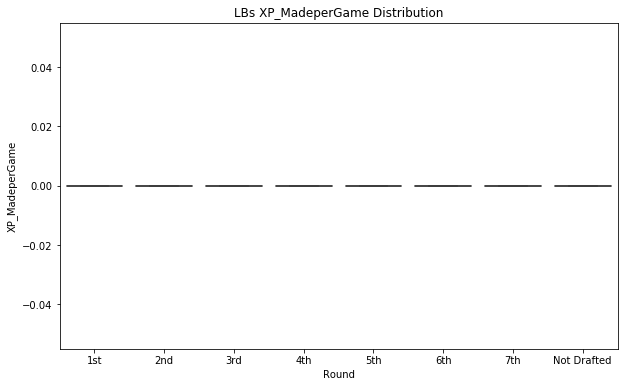

LBs XP_AttemptsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: XP_AttemptsperGame, dtype: float64
----------------------------------------
LBs XP_AttemptsperGame by Round
             XP_AttemptsperGame
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


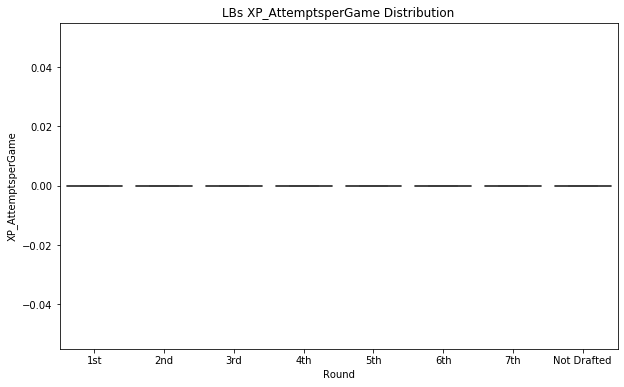

LBs FG_MadeperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: FG_MadeperGame, dtype: float64
----------------------------------------
LBs FG_MadeperGame by Round
             FG_MadeperGame
Round                      
1st                    0.00
2nd                    0.00
3rd                    0.00
4th                    0.00
5th                    0.00
6th                    0.00
7th                    0.00
Not Drafted            0.00


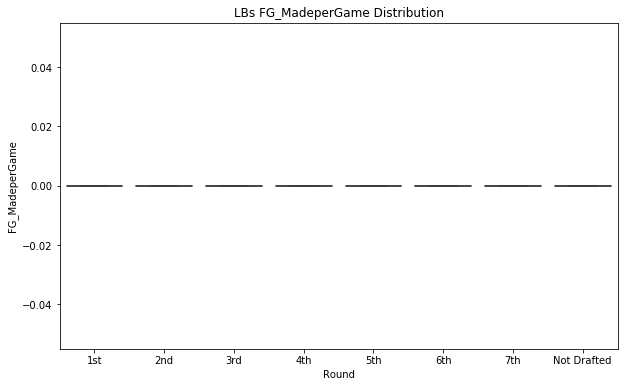

LBs FG_AttemptsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: FG_AttemptsperGame, dtype: float64
----------------------------------------
LBs FG_AttemptsperGame by Round
             FG_AttemptsperGame
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


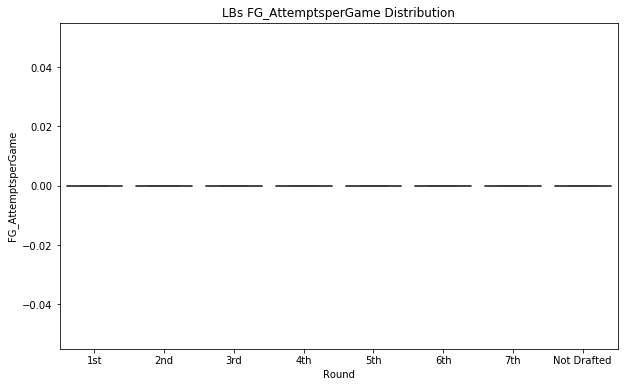

LBs TTL_Kicking_PointsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: TTL_Kicking_PointsperGame, dtype: float64
----------------------------------------
LBs TTL_Kicking_PointsperGame by Round
             TTL_Kicking_PointsperGame
Round                                 
1st                               0.00
2nd                               0.00
3rd                               0.00
4th                               0.00
5th                               0.00
6th                               0.00
7th                               0.00
Not Drafted                       0.00


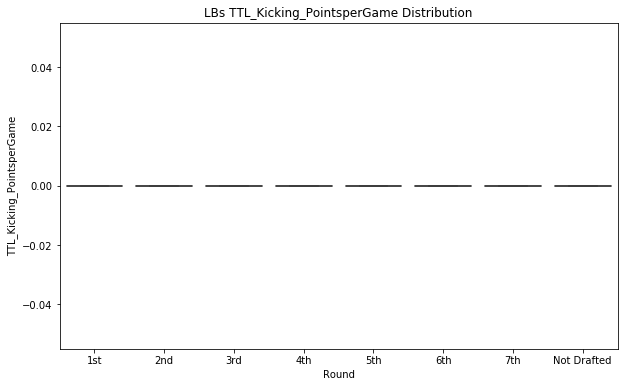

LBs NumPuntsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: NumPuntsperGame, dtype: float64
----------------------------------------
LBs NumPuntsperGame by Round
             NumPuntsperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


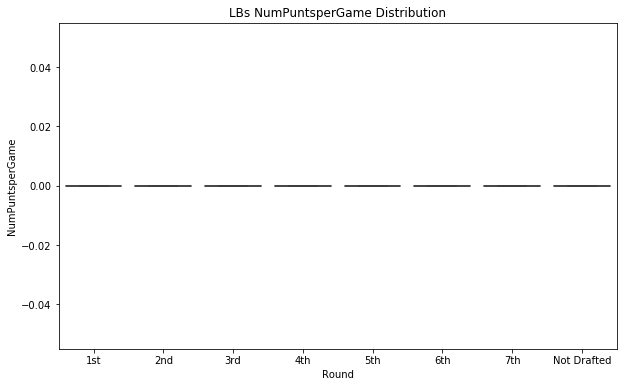

LBs Punt_YdsperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Punt_YdsperGame, dtype: float64
----------------------------------------
LBs Punt_YdsperGame by Round
             Punt_YdsperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


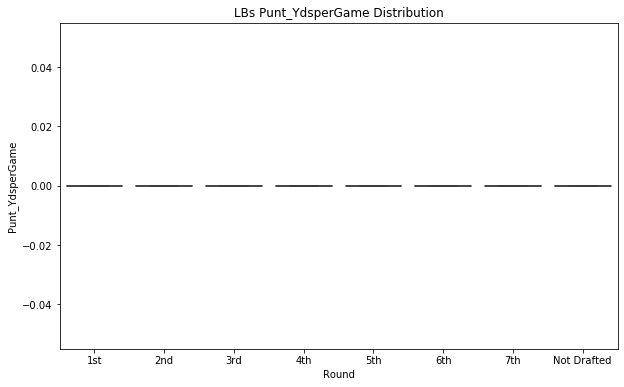

In [33]:
plot_stats('LBs', df, kicking_stats)

In [34]:
for i in kicking_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df, i)
    print('')
    print('*' * 40)

Kicking_Games ANOVA Test:
----------------------------------------
             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00    1.41     0.20 0.95    0.47
Residual 673.00  142.38     0.21  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd      0.0    0.9 -0.2356 0.2356  False
   1st         3rd   0.1348 0.6056 -0.0933  0.363  False
   1st         4th      0.0    0.9 -0.2329 0.2329  False
   1st         5th      0.0    0.9 -0.2335 0.2335  False
   1st         6th      0.0    0.9 -0.2631 0.2631  False
   1st         7th      0.0    0.9 -0.2631 0.2631  False
   1st Not Drafted      0.0    0.9 -0.2011 0.2011  False
   2nd         3rd   0.1348 0.5538 -0.0828 0.3525  False
   2nd         4th      0.0    0.9 -0.2226 0.2226  False
   2nd         5th      0.0    0.9 -0.2233 0.2233  False
   2nd         6th      0.0    0.9  -0.254  0.254  Fa


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  False
   1st         6th      0.0 0.5566   0.0   0.0  False
   1st         7th      0.0 0.5566   0.0   0.0  False
   1st Not Drafted      0.0 0.5566   0.0   0.0  False
   2nd         3rd      0.0 0.5566   0.0   0.0  False
   2nd         4th      0.0 0.5566   0.0   0.0  False
  

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  False
   1st         6th      0.0 0.5566   0.0   0.0  False
   1st         7th      0.0 0.5566   0.0   0.0  False
   1st Not Drafted      0.0 0.5566   0.0   0.0  False
   2nd         3rd      0.0 0.5566   0.0   0.0  False
   2nd         4th      0.0 0.5566   0.0   0.0  False
   2nd         5th      0.0 0.5566   0.0   0.0  False
   2nd         6th      0.0 0.5566   0.0   0.0  False
   2nd         7th      0.0 0.5566   0.0   0.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  False
   1st         6th      0.0 0.5566   0.0   0.0  False
   1st         7th      0.0 0.5566   0.0   0.0  False
   1st Not Drafted      0.0 0.5566   0.0   0.0  False
   2nd         3rd      0.0 0.5566   0.0   0.0  False
   2nd         4th      0.0 0.5566   0.0   0.0  False
   2nd         5th      0.0 0.5566   0.0   0.0  False
   2nd         6th      0.0 0.5566   0.0   0.0  False
   2nd         7th      0.0 0.5566   0.0   0.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  False
   1st         6th      0.0 0.5566   0.0   0.0  False
   1st         7th      0.0 0.5566   0.0   0.0  False
   1st Not Drafted      0.0 0.5566   0.0   0.0  False
   2nd         3rd      0.0 0.5566   0.0   0.0  False
   2nd         4th      0.0 0.5566   0.0   0.0  False
   2nd         5th      0.0 0.5566   0.0   0.0  False
   2nd         6th      0.0 0.5566   0.0   0.0  False
   2nd         7th  

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  False
   1st         6th      0.0 0.5566   0.0   0.0  False
   1st         7th      0.0 0.5566   0.0   0.0  False
   1st Not Drafted      0.0 0.5566   0.0   0.0  False
   2nd         3rd      0.0 0.5566   0.0   0.0  False
   2nd         4th      0.0 0.5566   0.0   0.0  False
   2nd         5th      0.0 0.5566   0.0   0.0  False
   2nd         6th      0.0 0.5566   0.0   0.0  False
   2nd         7th      0.0 0.5566   0.0   0.0  False
   2nd Not Drafted      0.0 0.5566   0.0   0.0  False
   3rd         4th      0.0 0.5566   

### College Stats - Punt Returns

In [35]:
puntret_stats = ['PuntRet_Games', 'Kickoff_Returns', 'KO_Return_Yds', 'Yds_per_KO_Return', 'KO_Returned_for_TD', 
                 'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame', 'KO_Returned_for_TDperGame']

In [36]:
df[puntret_stats].describe()

,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,1.28,0.01,0.13,0.05,0.00,0.00,0.01,0.00
std,3.76,0.16,3.06,0.89,0.00,0.01,0.28,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,14.00,4.00,79.00,19.80,0.00,0.36,7.18,0.00


LBs PuntRet_Games Summary:
count   681.00
mean      1.28
std       3.76
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      14.00
Name: PuntRet_Games, dtype: float64
----------------------------------------
LBs PuntRet_Games by Round
             PuntRet_Games
Round                     
1st                   2.72
2nd                   1.62
3rd                   0.85
4th                   1.49
5th                   1.25
6th                   1.58
7th                   1.50
Not Drafted           0.63


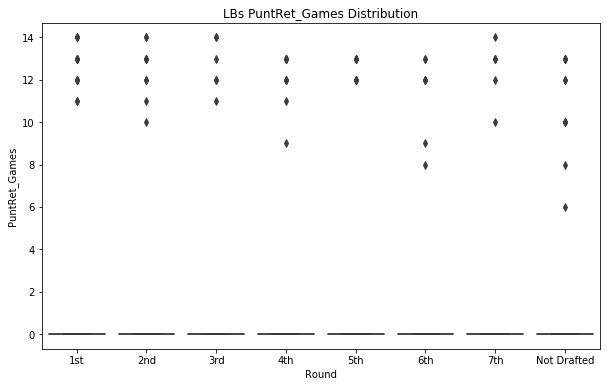

LBs Kickoff_Returns Summary:
count   681.00
mean      0.01
std       0.16
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.00
Name: Kickoff_Returns, dtype: float64
----------------------------------------
LBs Kickoff_Returns by Round
             Kickoff_Returns
Round                       
1st                     0.06
2nd                     0.00
3rd                     0.00
4th                     0.01
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


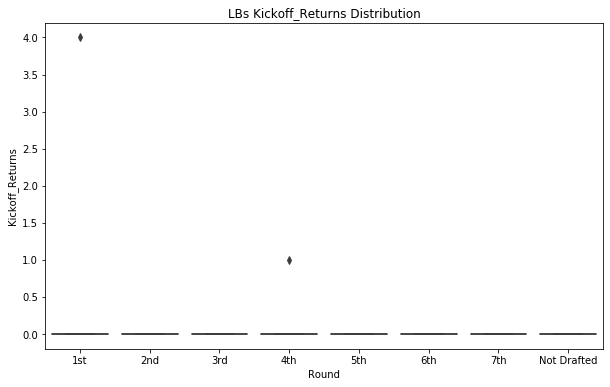

LBs KO_Return_Yds Summary:
count   681.00
mean      0.13
std       3.06
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      79.00
Name: KO_Return_Yds, dtype: float64
----------------------------------------
LBs KO_Return_Yds by Round
             KO_Return_Yds
Round                     
1st                   1.22
2nd                   0.00
3rd                   0.00
4th                   0.15
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


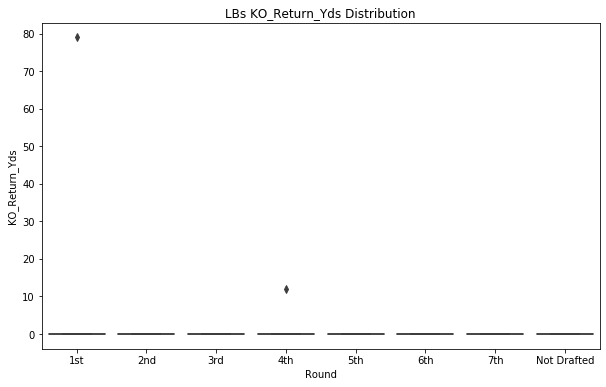

LBs Yds_per_KO_Return Summary:
count   681.00
mean      0.05
std       0.89
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      19.80
Name: Yds_per_KO_Return, dtype: float64
----------------------------------------
LBs Yds_per_KO_Return by Round
             Yds_per_KO_Return
Round                         
1st                       0.30
2nd                       0.00
3rd                       0.00
4th                       0.15
5th                       0.00
6th                       0.00
7th                       0.00
Not Drafted               0.00


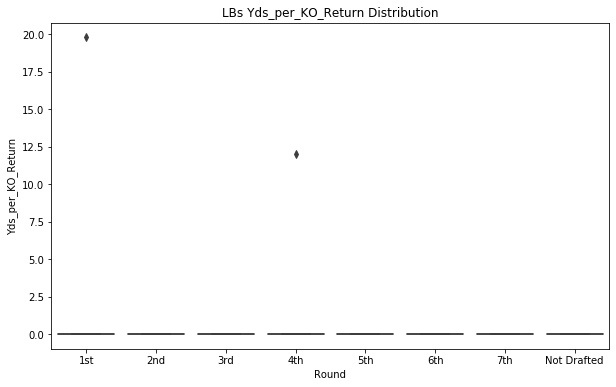

LBs KO_Returned_for_TD Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: KO_Returned_for_TD, dtype: float64
----------------------------------------
LBs KO_Returned_for_TD by Round
             KO_Returned_for_TD
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


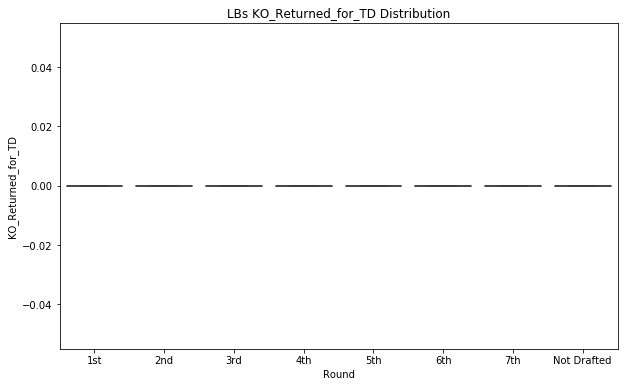

LBs Kickoff_ReturnsperGame Summary:
count   681.00
mean      0.00
std       0.01
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.36
Name: Kickoff_ReturnsperGame, dtype: float64
----------------------------------------
LBs Kickoff_ReturnsperGame by Round
             Kickoff_ReturnsperGame
Round                              
1st                            0.01
2nd                            0.00
3rd                            0.00
4th                            0.00
5th                            0.00
6th                            0.00
7th                            0.00
Not Drafted                    0.00


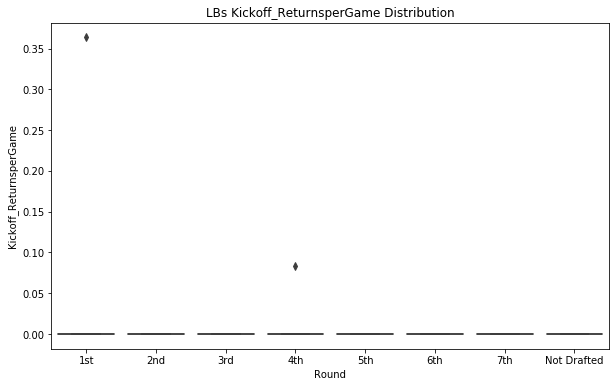

LBs KO_Return_YdsperGame Summary:
count   681.00
mean      0.01
std       0.28
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       7.18
Name: KO_Return_YdsperGame, dtype: float64
----------------------------------------
LBs KO_Return_YdsperGame by Round
             KO_Return_YdsperGame
Round                            
1st                          0.11
2nd                          0.00
3rd                          0.00
4th                          0.01
5th                          0.00
6th                          0.00
7th                          0.00
Not Drafted                  0.00


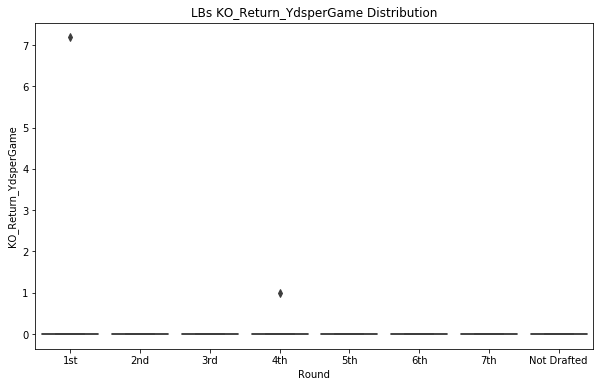

LBs KO_Returned_for_TDperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: KO_Returned_for_TDperGame, dtype: float64
----------------------------------------
LBs KO_Returned_for_TDperGame by Round
             KO_Returned_for_TDperGame
Round                                 
1st                               0.00
2nd                               0.00
3rd                               0.00
4th                               0.00
5th                               0.00
6th                               0.00
7th                               0.00
Not Drafted                       0.00


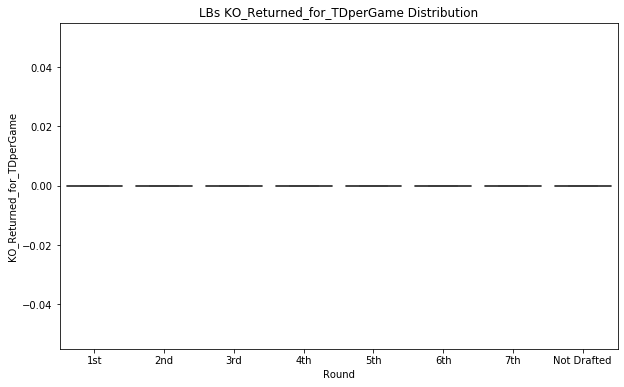

In [37]:
plot_stats('LBs', df, puntret_stats)

In [38]:
for i in puntret_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df,  i)
    print('')
    print('*' * 40)

PuntRet_Games ANOVA Test:
----------------------------------------
             df  sum_sq  mean_sq    F  PR(>F)
Round      7.00  249.94    35.71 2.56    0.01
Residual 673.00 9385.93    13.95  nan     nan

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd  -1.0997 0.6344 -3.0122  0.8128  False
   1st         3rd  -1.8691 0.0462 -3.7217 -0.0166   True
   1st         4th  -1.2292 0.4982 -3.1201  0.6616  False
   1st         5th  -1.4731 0.2619 -3.3691   0.423  False
   1st         6th  -1.1431 0.7065  -3.279  0.9928  False
   1st         7th  -1.2231 0.6387  -3.359  0.9128  False
   1st Not Drafted  -2.0882 0.0028 -3.7208 -0.4555   True
   2nd         3rd  -0.7694 0.8872 -2.5366  0.9977  False
   2nd         4th  -0.1295    0.9 -1.9368  1.6777  False
   2nd         5th  -0.3734    0.9 -2.1861  1.4393  False
   2nd         6th  -0.0434    0.9 -2.10


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  Fal

### College Stats - Scoring

In [39]:
scoring_stats = ['Scoring_Games', 'TD_Other', 'Ttl_TDs', 'TwoPT_Conversion', 'Safety', 'TTL_Points', 'TD_OtherperGame',
                 'Ttl_TDsperGame', 'TwoPT_ConversionperGame', 'SafetyperGame', 'TTL_PointsperGame']

In [40]:
df[scoring_stats].describe()

,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame
count,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00,681.00
mean,5.41,0.00,0.27,0.00,0.00,1.61,0.00,0.02,inf,0.00,inf
std,6.13,0.00,0.60,0.04,0.04,3.60,0.00,0.05,nan,0.00,nan
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,0.00,6.00,1.00,1.00,36.00,0.00,0.60,inf,0.09,inf


LBs Scoring_Games Summary:
count   681.00
mean      5.41
std       6.13
min       0.00
25%       0.00
50%       0.00
75%      12.00
max      15.00
Name: Scoring_Games, dtype: float64
----------------------------------------
LBs Scoring_Games by Round
             Scoring_Games
Round                     
1st                   6.62
2nd                   6.51
3rd                   6.69
4th                   5.04
5th                   4.75
6th                   5.14
7th                   4.94
Not Drafted           4.59


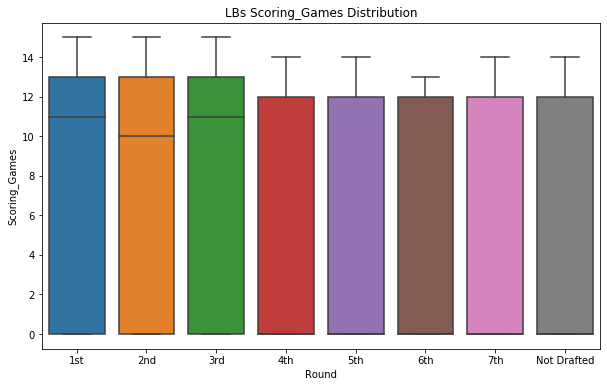

LBs TD_Other Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: TD_Other, dtype: float64
----------------------------------------
LBs TD_Other by Round
             TD_Other
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


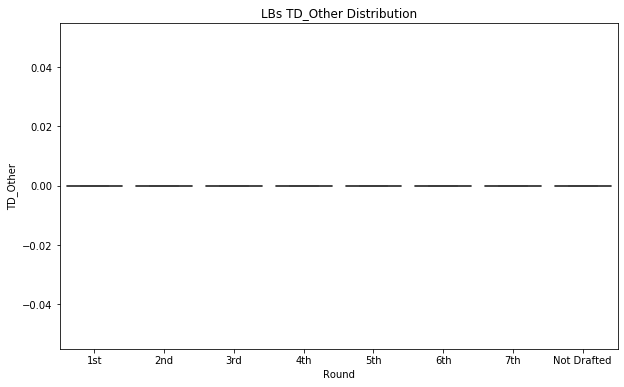

LBs Ttl_TDs Summary:
count   681.00
mean      0.27
std       0.60
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       6.00
Name: Ttl_TDs, dtype: float64
----------------------------------------
LBs Ttl_TDs by Round
             Ttl_TDs
Round               
1st             0.51
2nd             0.35
3rd             0.33
4th             0.17
5th             0.25
6th             0.20
7th             0.20
Not Drafted     0.21


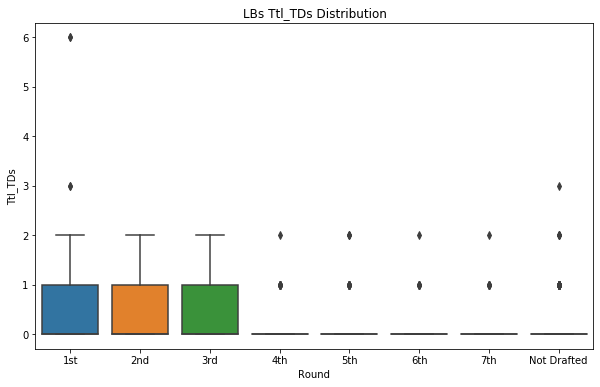

LBs TwoPT_Conversion Summary:
count   681.00
mean      0.00
std       0.04
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: TwoPT_Conversion, dtype: float64
----------------------------------------
LBs TwoPT_Conversion by Round
             TwoPT_Conversion
Round                        
1st                      0.02
2nd                      0.00
3rd                      0.00
4th                      0.00
5th                      0.00
6th                      0.00
7th                      0.00
Not Drafted              0.00


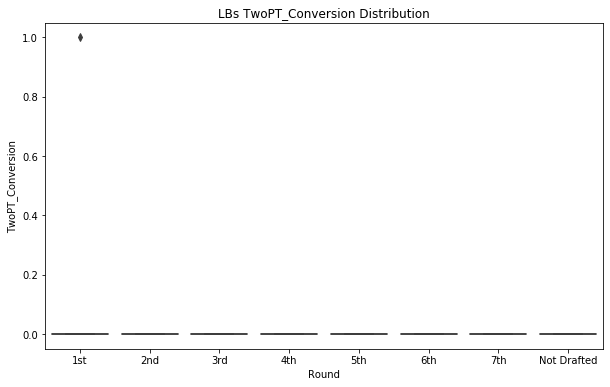

LBs Safety Summary:
count   681.00
mean      0.00
std       0.04
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: Safety, dtype: float64
----------------------------------------
LBs Safety by Round
             Safety
Round              
1st            0.00
2nd            0.00
3rd            0.00
4th            0.00
5th            0.00
6th            0.00
7th            0.00
Not Drafted    0.01


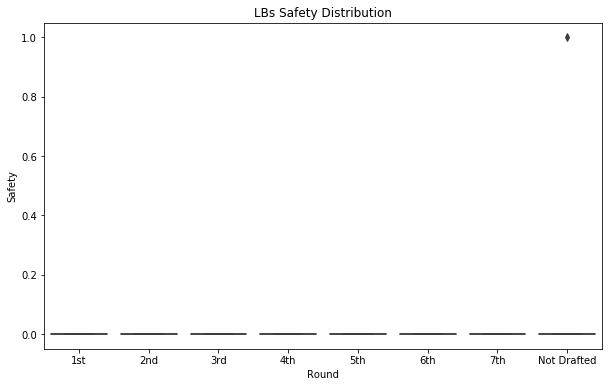

LBs TTL_Points Summary:
count   681.00
mean      1.61
std       3.60
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      36.00
Name: TTL_Points, dtype: float64
----------------------------------------
LBs TTL_Points by Round
             TTL_Points
Round                  
1st                3.08
2nd                2.10
3rd                1.96
4th                1.04
5th                1.50
6th                1.20
7th                1.20
Not Drafted        1.25


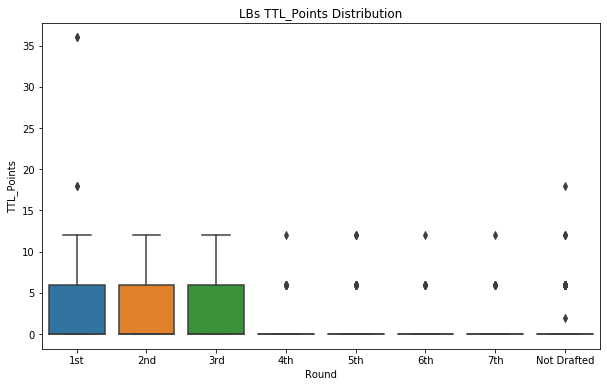

LBs TD_OtherperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: TD_OtherperGame, dtype: float64
----------------------------------------
LBs TD_OtherperGame by Round
             TD_OtherperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


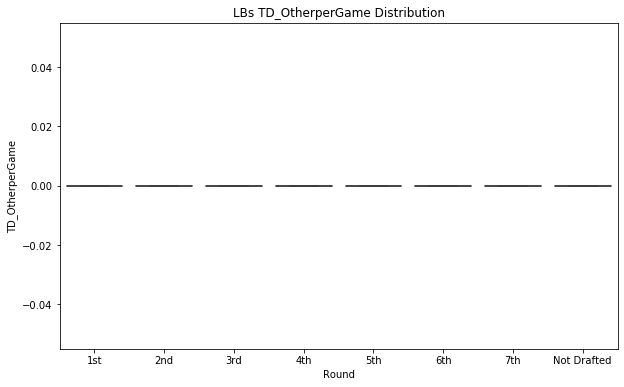

LBs Ttl_TDsperGame Summary:
count   681.00
mean      0.02
std       0.05
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.60
Name: Ttl_TDsperGame, dtype: float64
----------------------------------------
LBs Ttl_TDsperGame by Round
             Ttl_TDsperGame
Round                      
1st                    0.04
2nd                    0.03
3rd                    0.03
4th                    0.01
5th                    0.02
6th                    0.02
7th                    0.02
Not Drafted            0.02


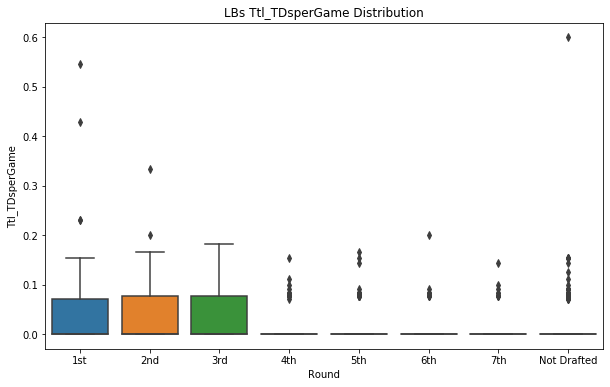

LBs TwoPT_ConversionperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       0.00
50%       0.00
75%       0.00
max        inf
Name: TwoPT_ConversionperGame, dtype: float64
----------------------------------------
LBs TwoPT_ConversionperGame by Round
             TwoPT_ConversionperGame
Round                               
1st                              inf
2nd                             0.00
3rd                             0.00
4th                             0.00
5th                             0.00
6th                             0.00
7th                             0.00
Not Drafted                     0.00


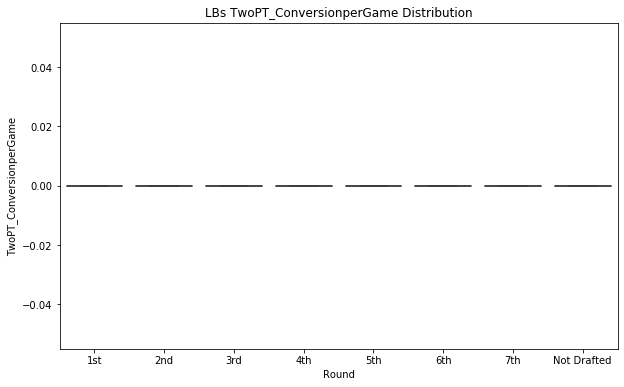

LBs SafetyperGame Summary:
count   681.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.09
Name: SafetyperGame, dtype: float64
----------------------------------------
LBs SafetyperGame by Round
             SafetyperGame
Round                     
1st                   0.00
2nd                   0.00
3rd                   0.00
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


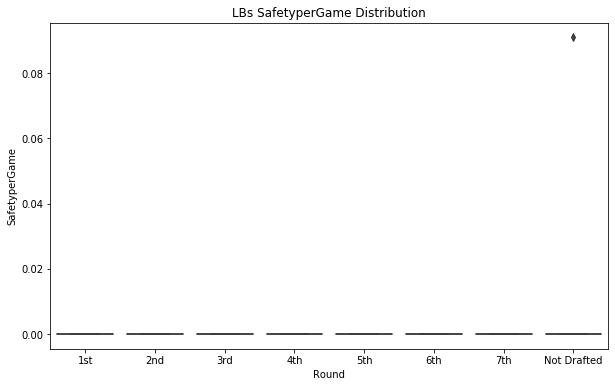

LBs TTL_PointsperGame Summary:
count   681.00
mean       inf
std        nan
min       0.00
25%       0.00
50%       0.00
75%       0.00
max        inf
Name: TTL_PointsperGame, dtype: float64
----------------------------------------
LBs TTL_PointsperGame by Round
             TTL_PointsperGame
Round                         
1st                        inf
2nd                       0.20
3rd                       0.16
4th                       0.09
5th                       0.12
6th                       0.10
7th                       0.10
Not Drafted               0.12


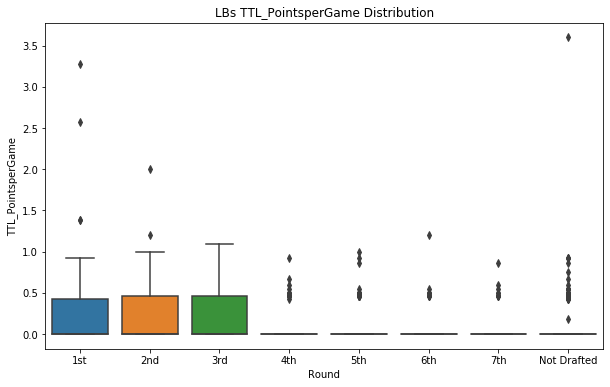

In [41]:
plot_stats('LBs', df, scoring_stats)

In [42]:
for i in scoring_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('LBs', df, i)
    print('')
    print('*' * 40)

Scoring_Games ANOVA Test:
----------------------------------------
             df   sum_sq  mean_sq    F  PR(>F)
Round      7.00   520.51    74.36 2.00    0.05
Residual 673.00 25026.36    37.19  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.1089    0.9 -3.2319 3.0141  False
   1st         3rd     0.07    0.9 -2.9551 3.0951  False
   1st         4th  -1.5783 0.7499 -4.6658 1.5091  False
   1st         5th  -1.8654 0.5846 -4.9615 1.2307  False
   1st         6th  -1.4754    0.9 -4.9631 2.0123  False
   1st         7th  -1.6754 0.8058 -5.1631 1.8123  False
   1st Not Drafted  -2.0281 0.2881 -4.6941 0.6379  False
   2nd         3rd   0.1789    0.9 -2.7067 3.0645  False
   2nd         4th  -1.4695 0.7739 -4.4205 1.4815  False
   2nd         5th  -1.7565  0.601 -4.7165 1.2035  False
   2nd         6th  -1.3665    0.9 -4.7339  2.001 

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd   -0.973 0.7126 -2.8027  0.8566  False
   1st         3rd  -1.1219 0.5293 -2.8941  0.6504  False
   1st         4th  -2.0399 0.0148 -3.8487  -0.231   True
   1st         5th  -1.5769 0.1422 -3.3908  0.2369  False
   1st         6th  -1.8769 0.0983 -3.9202  0.1664  False
   1st         7th  -1.8769 0.0983 -3.9202  0.1664  False
   1st Not Drafted  -1.8282 0.0094 -3.3901 -0.2664   True
   2nd         3rd  -0.1488    0.9 -1.8394  1.5417  False
   2nd         4th  -1.0669 0.5581 -2.7957   0.662  False
   2nd         5th  -0.6039    0.9  -2.338  1.1302  False
   2nd         6th  -0.9039  0.846 -2.8767   1.069  False
   2nd         7th  -0.9039  0.846 -2.8767   1.069  False
   2nd Not Drafted  -0.8552 0.6211 -2.3238  0.6133  False
   3rd         4th   -0.918  0.679 -2.5861    0.75  False
   3rd        


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd     -inf 0.5566   nan   nan  False
   1st         3rd     -inf 0.5566   nan   nan  False
   1st         4th     -inf 0.5566   nan   nan  False
   1st         5th     -inf 0.5566   nan   nan  Fal